# Introduction

As someone who's aspired to get into the tech and programming field, I'm particularly interested to take a look at some data related to women in tech, since, it is pretty well known that there is a gender gap between men and women in this field. I'm curios to learn more about their similarities and differences.

For the purpose of the analysis, I've used Stack Overflow Developer Survey, 2020 data in this notebook as it is a major resource for people who code around the world and we can gain many insight by analzying it. 

First, I will explore the data to get the sense of what we're looking at and then answering some specific questions by implementing CRISP-DM process.


# 1. Data Understanding

The Stackoverflow Developer Survey 2020 is in CSV format and can be obtained from here: https://insights.stackoverflow.com/survey

#### Loading the Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the Data

In [2]:
#importing the data and its schema
df = pd.read_csv('./developer_survey_2020/survey_results_public.csv')
schema = pd.read_csv('./developer_survey_2020/survey_results_schema.csv')

#### Observation

In [3]:
print (df.shape[0]) #the number of rows in the dataset
print( df.shape[1]) #the number of columns in the dataset

64461
61


In [4]:
#looking at the shape of the DataFrame and Schema
print(df.shape)
print(schema.shape)

(64461, 61)
(61, 2)


In [5]:
#observing the DataFrame
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
#looking at some of the questions from the schema
schema.loc[1:5]['QuestionText']

1    Which of the following options best describes ...
2                              Do you code as a hobby?
3    What is your age (in years)? If you prefer not...
4    At what age did you write your first line of c...
5     Is that compensation weekly, monthly, or yearly?
Name: QuestionText, dtype: object

There are 61 columns presenting the questions asked on the survey. And there are 64461 rows that represents the respondents.

#### Description

In [7]:
#looking at the numerical columns from the data
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [8]:
#looking at the index dtype and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

From the description and info above, most of the data are categorical, only four are the numerical in addition to the respondent data. However, Age1stCode, YearsCode and YearsCodePro can also be classified as numerical.

<AxesSubplot:>

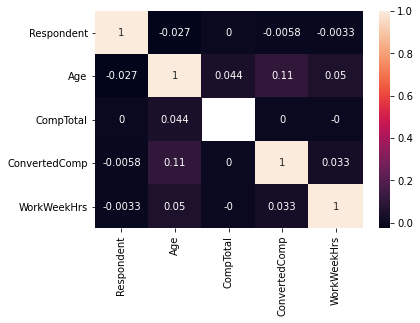

In [9]:
#looking at the correlation between the numerical columns with heatmap
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)

#### Exploration

In [10]:
#observing the Gender column
Gender = df['Gender'].value_counts()
Gender

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

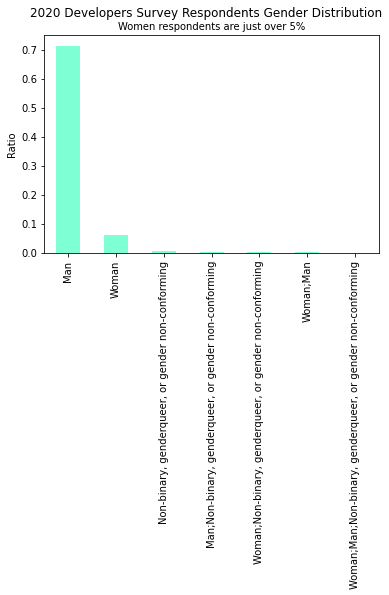

In [11]:
#Take a look at the ratio of the Gender column with a barplot
(Gender/df.shape[0]).plot(kind="bar", color ='aquamarine');
plt.suptitle("2020 Developers Survey Respondents Gender Distribution");
plt.title('Women respondents are just over 5%', fontsize = 10);
plt.ylabel('Ratio');

In [12]:
#observing the ConvertedComp(salary converted to USD) column
df['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
1000000.0    258
2000000.0    258
            ... 
230916.0       1
1135.0         1
348.0          1
132.0          1
44023.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [13]:
df['MainBranch'].value_counts()


I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [14]:
#observing the hours work per week column
df['YearsCodePro'].value_counts().head()

3    4815
2    4814
5    3978
4    3716
1    2818
Name: YearsCodePro, dtype: int64

In [15]:
#observing the languange used column
df['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                               1073
HTML/CSS;JavaScript                                                                        900
C#;HTML/CSS;JavaScript;SQL                                                                 856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                      754
HTML/CSS;JavaScript;TypeScript                                                             697
                                                                                          ... 
C;C++;Kotlin;SQL                                                                             1
Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Objective-C;Perl;PHP;Python;R;Ruby;SQL;VBA       1
C;Dart;HTML/CSS;Java;JavaScript;Python;SQL;Swift;TypeScript                                  1
C#;Go;HTML/CSS;SQL                                                                           1
C++;Haskell;HTML/CSS;Python;TypeScript            

In [16]:
#observing the developer types column
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                4424
Developer, back-end                                                                                                                                                                                                                                  3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                       2227
Developer, back-end;Developer, full-stack                                                                                                                                                                                                            1476


In [17]:
#observing the developer types column
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

# 2. Business Understanding

From the data above, I would like to analyze the following questions in relation to women in tech:

1. What are the distribution of women in tech (in comparison to men) in regard to the age, education level, and undergraduate major?
2. What are the popular developers type of women and men? How did men’s and women’s answers compare?
2. What are the popular programming languanges used by women and women? How did men’s and women’s answers compare?
3. How does women and men salary differ between each other?

To approach those questions, I will adopt CRISP-DM process:
1. Data preparation.
2. Data evaluation.

In this notebook, I don't intend to do Data modelling since I don't expect to predict the answers. To retrieve results and provide answer for the questions, using descriptive statistics and visualization would suffice. 

# 3 & 5. Data Preparation and Evaluation

After lookng at the data, I'll adopt the CRISP DM process to analyze the questions:
1. Data Preparation
2. Data Evaluation

Before preparing data for the question, we'll take a look at the gender column. Respondents can choose multiple answer, and the categories should be: 'Man', 'Woman', and 'Non-binary,genderqueer, or gender non-conforming'. 

We can also take a look how the distribution if we ungrouped the data; parse the data to get each value and grouped them together in a dictionary using the function below:

In [18]:
df_gender_check = df.copy()

In [19]:
#removing missing values from Gender column
df_gender_all_nonull = df_gender_check.loc[df_gender_check['Gender'].isnull() == False]

#checking the missing value again
df_gender_all_nonull['Gender'].isnull().mean()

0.0

In [20]:
#make a list of gender column
gender_list_all = list(df_gender_all_nonull['Gender'])

##### total_count function to parse grouped data

In [21]:
#create a function to parse the data 
def total_count(list):
    '''
    split function - split the intended column at every semicolon (;)
    
    INPUT:
    list - a list of string we want to search 

    
    OUTPUT:
    new_dict - a dictionary that for our new DataFrame with the count of how often the value shows up
    '''
    new_dict = {}
    for val in list:
        for i in val.split(';'):
            if i in new_dict:
                new_dict[i] += 1
            else:
                new_dict[i] = 1
    return new_dict

In [22]:
#use function
gender_dict_all = total_count(gender_list_all)
gender_dict_all

{'Man': 46236,
 'Woman': 4038,
 'Non-binary, genderqueer, or gender non-conforming': 624}

In [23]:
#creating gender dataframe with its count
df_gender_all = pd.DataFrame(pd.Series(gender_dict_all)).reset_index()
df_gender_all.columns = ['Gender', 'Count']
df_gender_all

,Gender,Count
0,Man,46236
1,Woman,4038
2,"Non-binary, genderqueer, or gender non-conforming",624


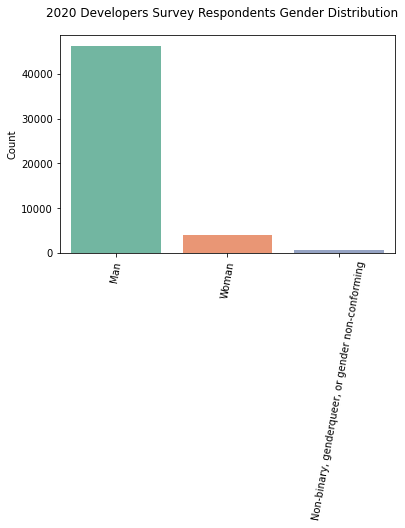

In [24]:
df_gender_all_plot = sns.barplot(x="Gender", y="Count", data=df_gender_all, palette = sns.color_palette("Set2"))
plt.suptitle("2020 Developers Survey Respondents Gender Distribution");
plt.xlabel('', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=80)
plt.show()

In this notebook, we will only utilize the respondents who identify themselves as only 'Man' and 'Woman' (not who choose multiply answers, including choosing woman/man on top of another option), so it will not add an additional layer of complexity/variability. The count of woman from the figure above is mixed with respondents who choose multiple answers, thus it won't be used, we will use the original count.

There is a significant different between the amount of man and woman. There were 3844 women (4038 if include the ones who choose non-binary as well) on this survey which was only 5.96% from the total respondents. Although considerably low, it is still worthwhile to look at the ones who got into the field.

### 1. How are the distribution of women in tech (in comparison to men) in regard to the age, education level, and undergraduate major?

There are three columns that will be analyzed for this question, first I will analyze the EdLevel column.
Secondly, I will take a loot at the major (using UndergradMajor column) for those who have bachelor's degree.
Last, I will also take a lookt at the Age column. I'll compare between men and women for all the three categories mentioned.

#### 1a. Data Preparation
For the data preparation:
- Dealing with missing values
- Selecting only woman and man to be compared
- Grouping education level, major, and age with gender (woman and man) 

##### a. Education Level

In [25]:
#copying dataframe
df_gen_ed = df.copy()

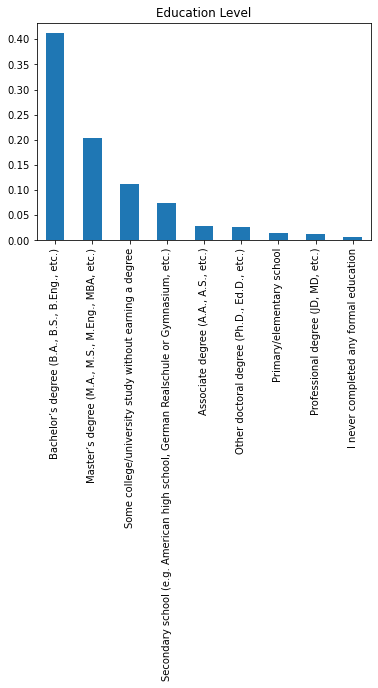

In [26]:
#plotting the ratio of education level column to see the distribution 
ed_df = df_gen_ed['EdLevel'].value_counts()
(ed_df/df_gen_ed.shape[0]).plot(kind="bar");
plt.title("Education Level");

Since respondent can only choose one answer, the data is not cluttered and looks good to be further analyzed.

In [27]:
#checking the missing value from the EdLevel column
df_ed_mean = df_gen_ed['EdLevel'].isnull().mean()
df_ed_sum = df_gen_ed['EdLevel'].isnull().sum()

print(df_ed_mean)
print(df_ed_sum)

0.10905819022354601
7030


In [28]:
#checking the missing value from the Gender column
df_gen_mean = df_gen_ed['Gender'].isnull().mean()
df_gen_sum = df_gen_ed['Gender'].isnull().sum()

print(df_gen_mean)
print(df_gen_sum)

0.21569631249903043
13904


In this question, I think it is appropriate to remove the missing values for Gender, EdLevel, and UndergradMajor as well as age columns since I want to see the relationship between them, thus the data should be present.

In [29]:
#removing missing values from EdLevel column
df_ed_nonull = df_gen_ed.loc[df_gen_ed['EdLevel'].isnull() == False]

#checking the missing value again
df_ed_nonull['EdLevel'].isnull().mean()

0.0

In [30]:
#removing missing values from Gender column
df_ed_nonull = df_gen_ed.loc[df_gen_ed['Gender'].isnull() == False]

#checking the missing value again
df_ed_nonull['Gender'].isnull().mean()

0.0

In [31]:
#selecting the columns
#selecting those who identify themselves and choose only man and female (not multiple answers)
df_gender_edu =  df_ed_nonull.loc[(df_ed_nonull['Gender'] == 'Man') | (df_ed_nonull['Gender'] == 'Woman')]
df_gender_edu = df_gender_edu.loc[:,[ 'Gender', 'EdLevel','Respondent']]
df_gender_edu

,Gender,EdLevel,Respondent
0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1
3,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4
4,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5
5,Man,"Secondary school (e.g. American high school, G...",6
7,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8
...,...,...,...
64437,Man,"Secondary school (e.g. American high school, G...",61983
64438,Man,Primary/elementary school,62391
64439,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",62464
64441,Man,"Secondary school (e.g. American high school, G...",62834


In [32]:
#grouped the columns
df_gender_edu = df_gender_edu.groupby(['EdLevel','Gender']).count()

#observing the data
df_gender_edu

Respondent
EdLevel                                            Gender            
Associate degree (A.A., A.S., etc.)                Man           1486
                                                   Woman          101
Bachelor’s degree (B.A., B.S., B.Eng., etc.)       Man          20542
                                                   Woman         1927
I never completed any formal education             Man            301
                                                   Woman           17
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)    Man          10200
                                                   Woman          948
Other doctoral degree (Ph.D., Ed.D., etc.)         Man           1298
                                                   Woman          149
Primary/elementary school                          Man            765
                                                   Woman           21
Professional degree (JD, MD, etc.)                 Man            614
                                                   Woman           40
Secondary school (e.g. American high school, Ge... Man           3912
                                                   Woman          211
Some college/university study without earning a... Man           5890
                                                   Woman          328

In [33]:
#reset index to column
df_gender_edu.reset_index(level=['EdLevel', 'Gender'], inplace=True)
df_gender_edu

,EdLevel,Gender,Respondent
0,"Associate degree (A.A., A.S., etc.)",Man,1486
1,"Associate degree (A.A., A.S., etc.)",Woman,101
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,20542
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Woman,1927
4,I never completed any formal education,Man,301
5,I never completed any formal education,Woman,17
6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,10200
7,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Woman,948
8,"Other doctoral degree (Ph.D., Ed.D., etc.)",Man,1298
9,"Other doctoral degree (Ph.D., Ed.D., etc.)",Woman,149


In [195]:
#selecting man only and make a percentage column
df_man_edu = df_gender_edu[df_gender_edu['Gender']== 'Man']
df_man_edu['ManPerc'] = df_man_edu['Respondent']/np.sum(df_man_edu['Respondent'])

#observing the data
df_man_edu

,EdLevel,Gender,Respondent,ManPerc
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,20542,0.456408
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,10200,0.226626
8,Some college/university study without earning ...,Man,5890,0.130866
7,"Secondary school (e.g. American high school, G...",Man,3912,0.086918
0,"Associate degree (A.A., A.S., etc.)",Man,1486,0.033016
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",Man,1298,0.028839
5,Primary/elementary school,Man,765,0.016997
6,"Professional degree (JD, MD, etc.)",Man,614,0.013642
2,I never completed any formal education,Man,301,0.006688


In [196]:
#selecting woman only and make a percentage column
df_woman_edu = df_gender_edu.loc[df_gender_edu['Gender']== 'Woman']
df_woman_edu['WomanPerc'] = df_woman_edu['Respondent']/np.sum(df_woman_edu['Respondent'])

#observing the data
df_woman_edu

,EdLevel,Gender,Respondent,WomanPerc
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Woman,1927,0.514965
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Woman,948,0.253340
8,Some college/university study without earning ...,Woman,328,0.087654
7,"Secondary school (e.g. American high school, G...",Woman,211,0.056387
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",Woman,149,0.039818
0,"Associate degree (A.A., A.S., etc.)",Woman,101,0.026991
6,"Professional degree (JD, MD, etc.)",Woman,40,0.010689
5,Primary/elementary school,Woman,21,0.005612
2,I never completed any formal education,Woman,17,0.004543


In [36]:
#set education as index for merging
df_man_edu = df_man_edu.set_index('EdLevel')
df_woman_edu = df_woman_edu.set_index('EdLevel')

In [37]:
#merge the woman and man data
df_gender_edulevel = pd.merge(df_woman_edu, df_man_edu, left_index=True, right_index=True)
df_gender_edulevel.columns = ['Gender','WomanCount', 'WomanPerc','Gender','ManCount','ManPerc']

##### b. Undergraduate Major

In [38]:
#copying dataframe
df_gen_maj = df.copy()

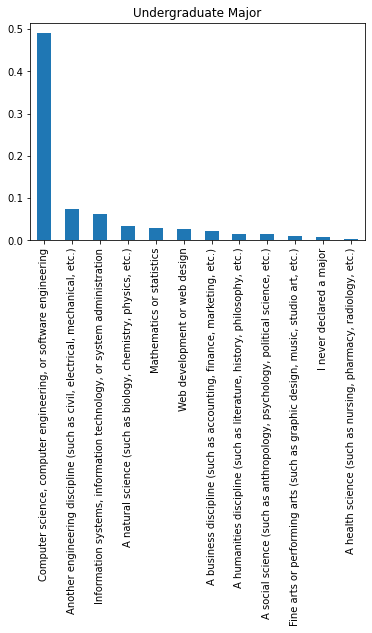

In [39]:
#plotting the ratio of undergraduate major column to see the distribution 
maj_df = df_gen_maj['UndergradMajor'].value_counts()
(maj_df/df_gen_maj.shape[0]).plot(kind="bar");
plt.title("Undergraduate Major");

Since respondent can only choose one answer, the data is not cluttered and looks good to be further analyzed.

In [40]:
#checking the missing value from the EdLevel column
df_maj_mean = df_gen_maj['UndergradMajor'].isnull().mean()
df_maj_sum = df_gen_maj['UndergradMajor'].isnull().sum()

print(df_maj_mean)
print(df_maj_sum)

0.20890150633716512
13466


In [41]:
#checking the missing value from the Gender column
df_genmaj_mean = df_gen_maj['Gender'].isnull().mean()
df_genmaj_sum = df_gen_maj['Gender'].isnull().sum()

print(df_genmaj_mean)
print(df_genmaj_sum)

0.21569631249903043
13904


In [42]:
#removing missing values from UndergradMajor column
df_maj_nonull = df_gen_maj.loc[df_gen_maj['UndergradMajor'].isnull() == False]

#checking the missing value again
df_maj_nonull['UndergradMajor'].isnull().mean()

0.0

In [43]:
#removing missing values from Gender column
df_maj_nonull = df_gen_maj.loc[df_gen_maj['Gender'].isnull() == False]

#checking the missing value again
df_maj_nonull['Gender'].isnull().mean()

0.0

In [44]:
#selecting the columns
#selecting those who identify themselves and choose only man and female (not multiple answers)
df_gender_maj =  df_maj_nonull.loc[(df_maj_nonull['Gender'] == 'Man') | (df_maj_nonull['Gender'] == 'Woman')]
df_gender_maj = df_gender_maj.loc[:,[ 'Gender', 'UndergradMajor','Respondent']]
df_gender_maj

,Gender,UndergradMajor,Respondent
0,Man,"Computer science, computer engineering, or sof...",1
3,Man,"Computer science, computer engineering, or sof...",4
4,Man,"Computer science, computer engineering, or sof...",5
5,Man,NaN,6
7,Man,"Computer science, computer engineering, or sof...",8
...,...,...,...
64437,Man,NaN,61983
64438,Man,NaN,62391
64439,Man,I never declared a major,62464
64441,Man,NaN,62834


In [45]:
#grouped the columns
df_gender_maj = df_gender_maj.groupby(['UndergradMajor','Gender']).count()

#observing the data
df_gender_maj

Respondent
UndergradMajor                                     Gender            
A business discipline (such as accounting, fina... Man           1067
                                                   Woman           96
A health science (such as nursing, pharmacy, ra... Man            179
                                                   Woman           43
A humanities discipline (such as literature, hi... Man            679
                                                   Woman          195
A natural science (such as biology, chemistry, ... Man           1711
                                                   Woman          232
A social science (such as anthropology, psychol... Man            634
                                                   Woman          166
Another engineering discipline (such as civil, ... Man           3834
                                                   Woman          222
Computer science, computer engineering, or soft... Man          25208
                                                   Woman         1800
Fine arts or performing arts (such as graphic d... Man            496
                                                   Woman          112
I never declared a major                           Man            356
                                                   Woman           28
Information systems, information technology, or... Man           3154
                                                   Woman          255
Mathematics or statistics                          Man           1426
                                                   Woman          159
Web development or web design                      Man           1265
                                                   Woman          126

In [46]:
#reset index to column
df_gender_maj.reset_index(level=['UndergradMajor', 'Gender'], inplace=True)
df_gender_maj

,UndergradMajor,Gender,Respondent
0,"A business discipline (such as accounting, fin...",Man,1067
1,"A business discipline (such as accounting, fin...",Woman,96
2,"A health science (such as nursing, pharmacy, r...",Man,179
3,"A health science (such as nursing, pharmacy, r...",Woman,43
4,"A humanities discipline (such as literature, h...",Man,679
5,"A humanities discipline (such as literature, h...",Woman,195
6,"A natural science (such as biology, chemistry,...",Man,1711
7,"A natural science (such as biology, chemistry,...",Woman,232
8,"A social science (such as anthropology, psycho...",Man,634
9,"A social science (such as anthropology, psycho...",Woman,166


In [197]:
#selecting man only and make a percentage column
df_man_maj = df_gender_maj[df_gender_maj['Gender']== 'Man']
df_man_maj['ManPerc'] = df_man_maj['Respondent']/np.sum(df_man_maj['Respondent'])

#observing the data
df_man_maj

,UndergradMajor,Gender,Respondent,ManPerc
6,"Computer science, computer engineering, or sof...",Man,25208,0.630058
5,"Another engineering discipline (such as civil,...",Man,3834,0.095828
9,"Information systems, information technology, o...",Man,3154,0.078832
3,"A natural science (such as biology, chemistry,...",Man,1711,0.042765
10,Mathematics or statistics,Man,1426,0.035642
11,Web development or web design,Man,1265,0.031618
0,"A business discipline (such as accounting, fin...",Man,1067,0.026669
2,"A humanities discipline (such as literature, h...",Man,679,0.016971
4,"A social science (such as anthropology, psycho...",Man,634,0.015846
7,Fine arts or performing arts (such as graphic ...,Man,496,0.012397


In [198]:
#selecting woman only and make a percentage column
df_woman_maj = df_gender_maj.loc[df_gender_maj['Gender']== 'Woman']
df_woman_maj['WomanPerc'] = df_woman_maj['Respondent']/np.sum(df_woman_maj['Respondent'])

#observing the data
df_woman_maj

,UndergradMajor,Gender,Respondent,WomanPerc
6,"Computer science, computer engineering, or sof...",Woman,1800,0.524170
9,"Information systems, information technology, o...",Woman,255,0.074257
3,"A natural science (such as biology, chemistry,...",Woman,232,0.067560
5,"Another engineering discipline (such as civil,...",Woman,222,0.064648
2,"A humanities discipline (such as literature, h...",Woman,195,0.056785
4,"A social science (such as anthropology, psycho...",Woman,166,0.048340
10,Mathematics or statistics,Woman,159,0.046302
11,Web development or web design,Woman,126,0.036692
7,Fine arts or performing arts (such as graphic ...,Woman,112,0.032615
0,"A business discipline (such as accounting, fin...",Woman,96,0.027956


In [49]:
#set major as index for merging
df_man_maj = df_man_maj.set_index('UndergradMajor')
df_woman_maj = df_woman_maj.set_index('UndergradMajor')

In [50]:
#merge the woman and man data
df_gender_major = pd.merge(df_woman_maj, df_man_maj, left_index=True, right_index=True)
df_gender_major.columns = ['Gender','WomanCount', 'WomanPerc','Gender','ManCount','ManPerc']

##### c. Age

In [51]:
#copying dataframe
df_gen_age = df.copy()

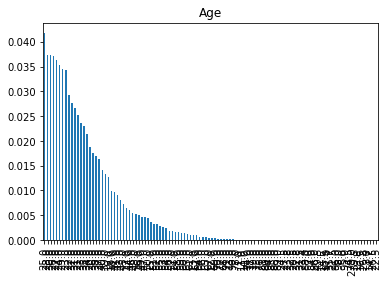

In [52]:
#plotting the ratio of age column to see the distribution 
age_df = df_gen_age['Age'].value_counts()
(age_df/df_gen_age.shape[0]).plot(kind="bar");
plt.title("Age");

The x value is cluttered because there is a lot of age value (age 1 to up to 100). It can be reduced by categorization.

In [53]:
#checking the missing value from the Age column
df_age_mean = df_gen_age['Age'].isnull().mean()
df_age_sum = df_gen_age['Age'].isnull().sum()

print(df_age_mean)
print(df_age_sum)

0.2949845643102031
19015


In [54]:
#checking the missing value from the Gender column
df_genage_mean = df_gen_age['Gender'].isnull().mean()
df_genage_sum = df_gen_age['Gender'].isnull().sum()

print(df_genage_mean)
print(df_genage_sum)

0.21569631249903043
13904


In [55]:
#removing missing values from Age column
df_age_nonull = df_gen_age.loc[df_gen_age['Age'].isnull() == False]

#checking the missing value again
df_age_nonull['Age'].isnull().mean()

0.0

In [56]:
#removing missing values from Gender column
df_age_nonull = df_gen_age.loc[df_gen_maj['Gender'].isnull() == False]

#checking the missing value again
df_age_nonull['Gender'].isnull().mean()

0.0

In [199]:
#Reducing the no of categoties for Age
df_age_nonull['Age'].replace([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0],'1-10',inplace = True)
df_age_nonull['Age'].replace([11.0,12.0,13.0,14.0,14.5, 14.7,15.0,15.5, 16.0,16.5,17.0,18.0,19.0,19.8,20.0],'11-20',inplace = True)
df_age_nonull['Age'].replace([20.5, 21.0,21.5, 22.0,22.5,23.0,23.4,23.8,24.0,24.5,25.0,26.0,26.5,26.8,27.0,27.5,28.0,29.0,30.0],'21-30',inplace = True)
df_age_nonull['Age'].replace([31.0,31.5,32.0,32.5,32.8,33.0,34.0,34.5,35.0,35.7,36.0,37.0,38.0,39.0,39.5,40.0],'31-40',inplace = True)
df_age_nonull['Age'].replace([41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,49.5,50.0],'41-50',inplace = True)
df_age_nonull['Age'].replace([51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0],'51-60',inplace = True)
df_age_nonull['Age'].replace([61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0],'61-70',inplace = True)
df_age_nonull['Age'].replace([71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0],'71-80',inplace = True)
df_age_nonull['Age'].replace([81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0],'81-90',inplace = True)
df_age_nonull['Age'].replace([91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0],'91-100',inplace = True)
df_age_nonull['Age'].replace([100.0,279.0],'> 100',inplace = True)


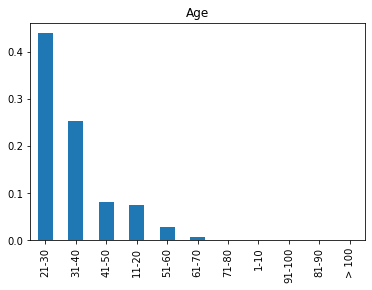

In [58]:
#check the ratio plot with the new category
age_df_new = df_age_nonull['Age'].value_counts()
(age_df_new/df_age_nonull.shape[0]).plot(kind="bar");
plt.title("Age");

In [59]:
#selecting the columns
#selecting those who identify themselves and choose only man and female (not multiple answers)
df_gender_age =  df_age_nonull.loc[(df_age_nonull['Gender'] == 'Man') | (df_age_nonull['Gender'] == 'Woman')]
df_gender_age = df_gender_age.loc[:,[ 'Gender', 'Age','Respondent']]
df_gender_age

,Gender,Age,Respondent
0,Man,NaN,1
3,Man,21-30,4
4,Man,31-40,5
5,Man,NaN,6
7,Man,31-40,8
...,...,...,...
64437,Man,NaN,61983
64438,Man,NaN,62391
64439,Man,NaN,62464
64441,Man,11-20,62834


In [60]:
#grouped the columns
df_gender_age = df_gender_age.groupby(['Age','Gender']).count()

#observing the data
df_gender_age

Respondent
Age    Gender            
1-10   Man              7
       Woman            1
11-20  Man           3497
       Woman          190
21-30  Man          20016
       Woman         1897
31-40  Man          11739
       Woman          876
41-50  Man           3871
       Woman          234
51-60  Man           1331
       Woman           99
61-70  Man            381
       Woman           18
71-80  Man             72
       Woman            3
81-90  Man             10
91-100 Man              4
       Woman            2
> 100  Man              1

In [61]:
#reset index to column
df_gender_age.reset_index(level=['Age', 'Gender'], inplace=True)
df_gender_age

,Age,Gender,Respondent
0,1-10,Man,7
1,1-10,Woman,1
2,11-20,Man,3497
3,11-20,Woman,190
4,21-30,Man,20016
5,21-30,Woman,1897
6,31-40,Man,11739
7,31-40,Woman,876
8,41-50,Man,3871
9,41-50,Woman,234


In [200]:
#selecting man only and make a percentage column
df_man_age = df_gender_age[df_gender_age['Gender']== 'Man']
df_man_age['ManPerc'] = df_man_age['Respondent']/np.sum(df_man_age['Respondent'])

#observing the data
df_man_age

,Age,Gender,Respondent,ManPerc
2,21-30,Man,20016,0.489042
3,31-40,Man,11739,0.286814
4,41-50,Man,3871,0.094578
1,11-20,Man,3497,0.085441
5,51-60,Man,1331,0.032520
6,61-70,Man,381,0.009309
7,71-80,Man,72,0.001759
8,81-90,Man,10,0.000244
0,1-10,Man,7,0.000171
9,91-100,Man,4,0.000098


In [201]:
#selecting woman only and make a percentage column
df_woman_age = df_gender_age.loc[df_gender_age['Gender']== 'Woman']
df_woman_age['WomanPerc'] = df_woman_age['Respondent']/np.sum(df_woman_age['Respondent'])

#observing the data
df_woman_age

,Age,Gender,Respondent,WomanPerc
2,21-30,Woman,1897,0.571386
3,31-40,Woman,876,0.263855
4,41-50,Woman,234,0.070482
1,11-20,Woman,190,0.057229
5,51-60,Woman,99,0.029819
6,61-70,Woman,18,0.005422
7,71-80,Woman,3,0.000904
8,91-100,Woman,2,0.000602
0,1-10,Woman,1,0.000301


In [64]:
#set major as index for merging
df_man_age = df_man_age.set_index('Age')
df_woman_age = df_woman_age.set_index('Age')


In [65]:
#merge the woman and man data
df_gender_age = pd.merge(df_woman_age, df_man_age, left_index=True, right_index=True)
df_gender_age.columns = ['Gender','WomanCount', 'WomanPerc','Gender','ManCount','ManPerc']

#### 1b. Data Evaluation
Take a look at the data and then visualize it.

##### a. Women and Men Education Level 

In [66]:
#education level and gender  
df_gender_edulevel

,Gender,WomanCount,WomanPerc,Gender,ManCount,ManPerc
EdLevel,,,,,,
"Associate degree (A.A., A.S., etc.)",Woman,101,0.026991,Man,1486,0.033016
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Woman,1927,0.514965,Man,20542,0.456408
I never completed any formal education,Woman,17,0.004543,Man,301,0.006688
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Woman,948,0.253340,Man,10200,0.226626
"Other doctoral degree (Ph.D., Ed.D., etc.)",Woman,149,0.039818,Man,1298,0.028839
Primary/elementary school,Woman,21,0.005612,Man,765,0.016997
"Professional degree (JD, MD, etc.)",Woman,40,0.010689,Man,614,0.013642
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Woman,211,0.056387,Man,3912,0.086918
Some college/university study without earning a degree,Woman,328,0.087654,Man,5890,0.130866


In [67]:
#sorting by woman percentgae
df_gender_edulevel.sort_values('WomanPerc', ascending=False, inplace=True)

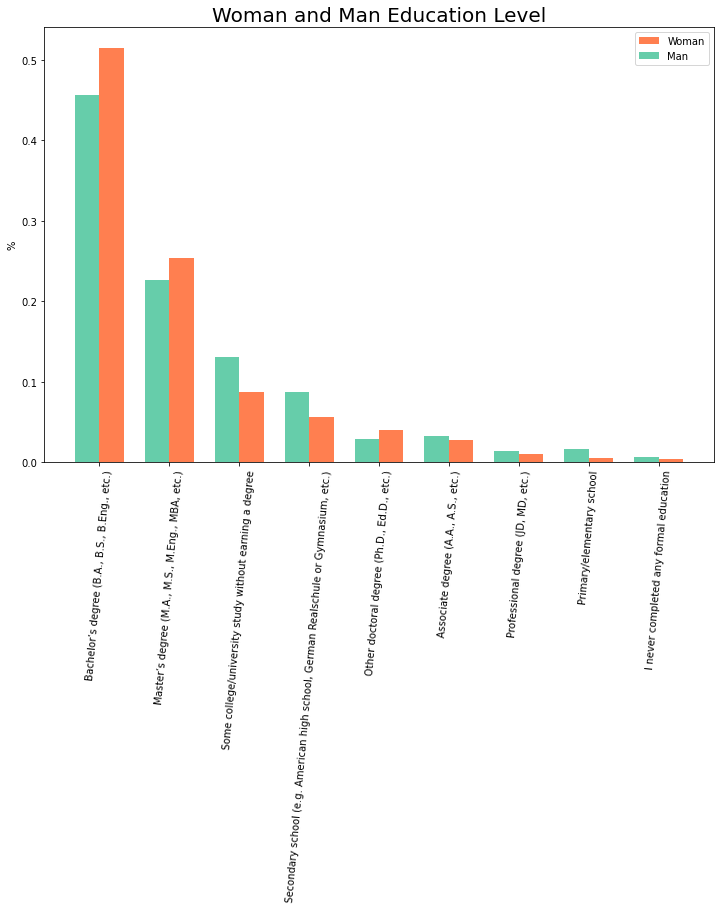

In [68]:
#visualize the percentage comparison between men and women according to their education
xticklabels = df_gender_edulevel.index

x = np.arange(len(xticklabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [12, 8])
rects1 = ax.bar(x + width/2, df_gender_edulevel['WomanPerc'], width, label='Woman', color = 'coral')
rects2 = ax.bar(x - width/2, df_gender_edulevel['ManPerc'], width, label='Man', color ='mediumaquamarine' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_xlabel('')
ax.set_title('Woman and Man Education Level', fontsize = 20)

ax.set_xticks(x)

ax.set_xticklabels(xticklabels, rotation = 85)
ax.legend(fontsize=10)

#fig.tight_layout()

plt.show()

Comparing education of woman and man by visualizing the df separately

In [69]:
#reset index to column for plotting
df_woman_edu.reset_index(level=['EdLevel'], inplace=True)
df_man_edu.reset_index(level=['EdLevel'], inplace=True)

In [70]:
#sorting df by respondent
df_woman_edu.sort_values('Respondent', ascending=False, inplace=True)
df_man_edu.sort_values('Respondent', ascending=False, inplace=True)

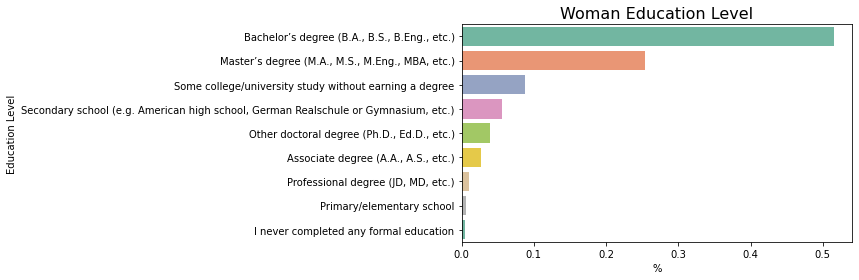

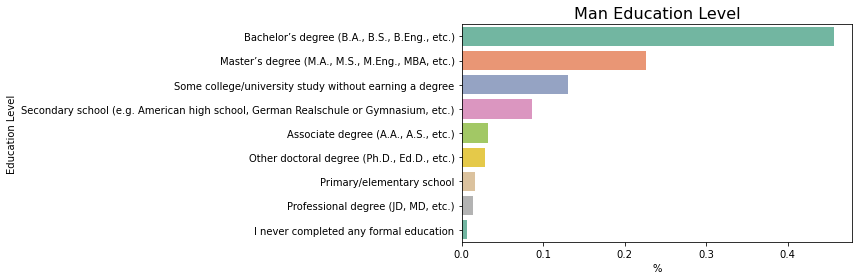

In [202]:
#visualize education level of woman
plt.figure(figsize=[7,4])
sns.barplot( y = 'EdLevel' , x = 'WomanPerc', data = df_woman_edu, palette = sns.color_palette("Set2"))
plt.title('Woman Education Level', fontsize = 16)
plt.xlabel("%")
plt.ylabel("Education Level")

#visualize education level of man
plt.figure(figsize=[7,4])
sns.barplot( y = 'EdLevel' , x = 'ManPerc', data = df_man_edu, palette = sns.color_palette("Set2"))
plt.title('Man Education Level', fontsize = 16)
plt.xlabel("%")
plt.ylabel("Education Level")

plt.show()

Despite the difference in the amount of respondence, education level of women and men show similar pattern with Bachelor's degree being the highest education level for most of them. But more men than women have no college degree or have secondary school at their highest degree

##### b. Women and Men Undergraduate Major

In [72]:
#undergrad major and gender
df_gender_major

,Gender,WomanCount,WomanPerc,Gender,ManCount,ManPerc
UndergradMajor,,,,,,
"A business discipline (such as accounting, finance, marketing, etc.)",Woman,96,0.027956,Man,1067,0.026669
"A health science (such as nursing, pharmacy, radiology, etc.)",Woman,43,0.012522,Man,179,0.004474
"A humanities discipline (such as literature, history, philosophy, etc.)",Woman,195,0.056785,Man,679,0.016971
"A natural science (such as biology, chemistry, physics, etc.)",Woman,232,0.067560,Man,1711,0.042765
"A social science (such as anthropology, psychology, political science, etc.)",Woman,166,0.048340,Man,634,0.015846
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",Woman,222,0.064648,Man,3834,0.095828
"Computer science, computer engineering, or software engineering",Woman,1800,0.524170,Man,25208,0.630058
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",Woman,112,0.032615,Man,496,0.012397
I never declared a major,Woman,28,0.008154,Man,356,0.008898


In [73]:
#sorting by woman percentgae
df_gender_major.sort_values('WomanPerc', ascending=False, inplace=True)

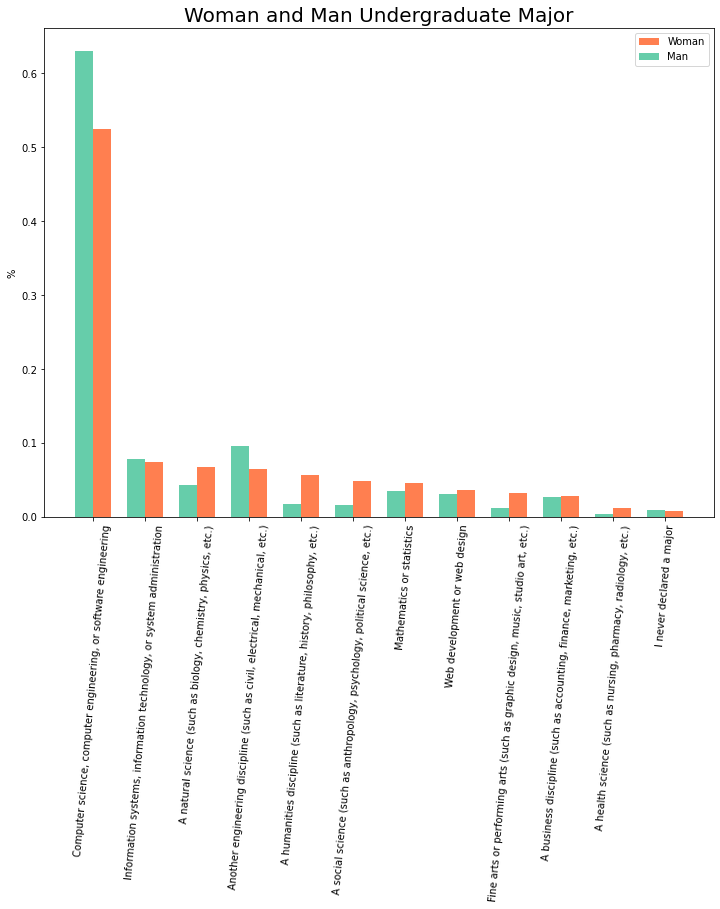

In [74]:
#visualize the percentage comparison between men and women according to their education
xticklabels = df_gender_major.index

x = np.arange(len(xticklabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [12, 9])
rects1 = ax.bar(x + width/2, df_gender_major['WomanPerc'], width, label='Woman', color = 'coral')
rects2 = ax.bar(x - width/2, df_gender_major['ManPerc'], width, label='Man', color ='mediumaquamarine' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_xlabel('')
ax.set_title('Woman and Man Undergraduate Major', fontsize = 20)

ax.set_xticks(x)
ax.set_xticklabels(xticklabels, rotation = 85)
ax.legend(fontsize=10)

#fig.tight_layout()

plt.show()

Comparing major of woman and man by visualizing the df separately

In [75]:
#reset index to column for plotting
df_woman_maj.reset_index(level=['UndergradMajor'], inplace=True)
df_man_maj.reset_index(level=['UndergradMajor'], inplace=True)

In [76]:
#sort values by the count of respondent
df_woman_maj.sort_values('Respondent', ascending=False, inplace=True)
df_man_maj.sort_values('Respondent', ascending=False, inplace=True)

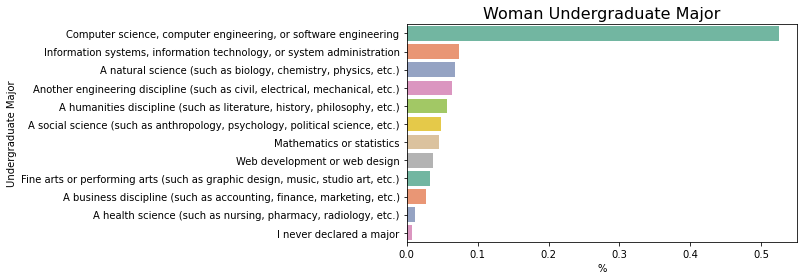

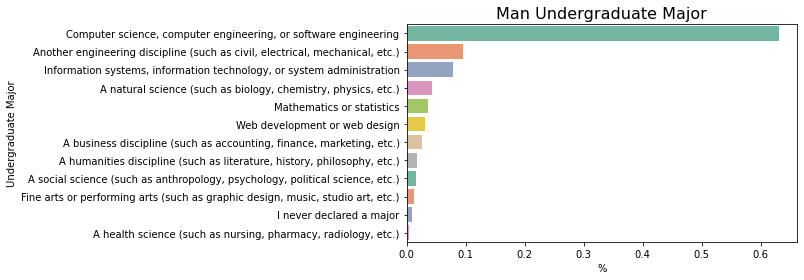

In [203]:
#visualize major of woman
plt.figure(figsize=[7,4])
sns.barplot( y = 'UndergradMajor' , x = 'WomanPerc', data = df_woman_maj, palette = sns.color_palette("Set2"))
plt.title('Woman Undergraduate Major', fontsize = 16)
plt.ylabel('Undergraduate Major')
plt.xlabel('%')

#visualize major of man
plt.figure(figsize=[7,4])
sns.barplot( y = 'UndergradMajor' , x = 'ManPerc', data = df_man_maj, palette = sns.color_palette("Set2"))
plt.title('Man Undergraduate Major', fontsize = 16)
plt.ylabel('Undergraduate Major')
plt.xlabel('%')

plt.show()

Most women have computer science related major (same as men), but for women it is followed by information system and natural science major, while for men, it is followed by engineering discipline and information system. Women tend to have a more diverse major (non-programming related)

##### c. Woman and Man Age

In [78]:
#age and gender
df_gender_age

,Gender,WomanCount,WomanPerc,Gender,ManCount,ManPerc
Age,,,,,,
1-10,Woman,1,0.000301,Man,7,0.000171
11-20,Woman,190,0.057229,Man,3497,0.085441
21-30,Woman,1897,0.571386,Man,20016,0.489042
31-40,Woman,876,0.263855,Man,11739,0.286814
41-50,Woman,234,0.070482,Man,3871,0.094578
51-60,Woman,99,0.029819,Man,1331,0.032520
61-70,Woman,18,0.005422,Man,381,0.009309
71-80,Woman,3,0.000904,Man,72,0.001759
91-100,Woman,2,0.000602,Man,4,0.000098


In [79]:
#sorting by woman percentgae
df_gender_age.sort_values('WomanPerc', ascending=False, inplace=True)

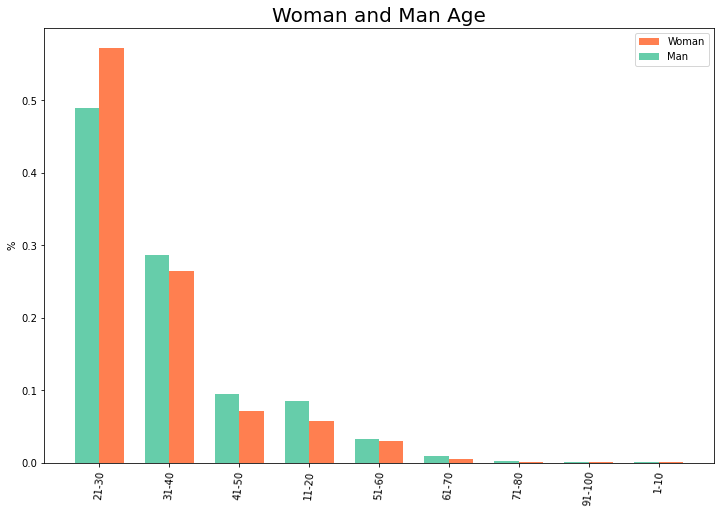

In [80]:
#visualize the percentage comparison between men and women according to their age
xticklabels = df_gender_age.index

x = np.arange(len(xticklabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [12, 8])
rects1 = ax.bar(x + width/2, df_gender_age['WomanPerc'], width, label='Woman', color = 'coral')
rects2 = ax.bar(x - width/2, df_gender_age['ManPerc'], width, label='Man', color ='mediumaquamarine' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_xlabel('')
ax.set_title('Woman and Man Age', fontsize = 20)

ax.set_xticks(x)

ax.set_xticklabels(xticklabels, rotation = 85)
ax.legend(fontsize=10)

#fig.tight_layout()

plt.show()

Comparing age of woman and man by visualizing the df separately

In [81]:
#reset index to column for plotting
df_woman_age.reset_index(level=['Age'], inplace=True)
df_man_age.reset_index(level=['Age'], inplace=True)

In [82]:
#sort values by respondent count
df_woman_age.sort_values('Respondent', ascending=False, inplace=True)
df_man_age.sort_values('Respondent', ascending=False, inplace=True)

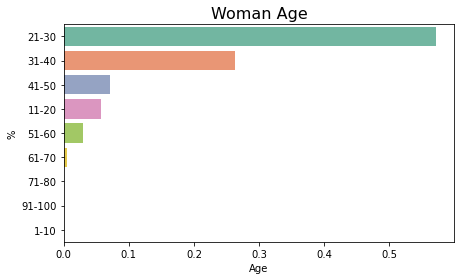

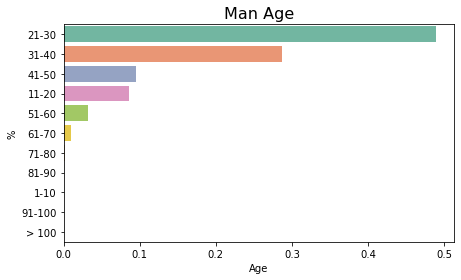

In [204]:
#visualize age of woman
plt.figure(figsize=[7,4])
sns.barplot( y = 'Age' , x = 'WomanPerc', data = df_woman_age, palette = sns.color_palette("Set2"))
plt.title('Woman Age', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('%')

#visualize age of man
plt.figure(figsize=[7,4])
sns.barplot( y = 'Age' , x = 'ManPerc', data = df_man_age, palette = sns.color_palette("Set2"))
plt.title('Man Age', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('%')

plt.show()

The age distribution for women and men are similar. Mostly developers are between 21 - 30 years old. More 11-20 years old can be seen rateher than those who are over 50. Perhaps the age range for developers who filled in the survey are between 11 - 50.

### 2. What are the popular developers type among women and men? How did men’s and women’s answers compare?

#### 2a. Data Preparation

For data preparation:
- Dealing with missing values
- Select only the ones who identified as Man or Woman
- Separate (parse) the grouped data (DevType column)


In [84]:
#copying df to make new dataframe
df_gen_dev = df.copy()

In [85]:
#check the missing value from the Gender column
gender_null_mean = df_gen_dev['Gender'].isnull().mean()
gender_null_sum = df_gen_dev['Gender'].isnull().sum()

print(gender_null_mean)
print(gender_null_sum)

0.21569631249903043
13904


In [86]:
#check the missing value from the DevType column
dev_null_mean = df_gen_dev['DevType'].isnull().mean()
dev_null_sum = df_gen_dev['DevType'].isnull().sum()

print(dev_null_mean)
print(dev_null_sum)

0.23411054746280696
15091


For the missing values in this question, the same as before, it will be removed because we need the information from both. The question will focus on respondents who identify themselves as only 'Man' and 'Woman' and we will separate them and first.

In [87]:
# Grouping the dataframes based on man and woman
df_man = df_gen_dev.loc[df_gen_dev['Gender'] == 'Man']
df_woman = df_gen_dev.loc[df_gen_dev['Gender'] == 'Woman']

In [88]:
#Removing missing values from the DevType column and save it into a new DataFrame without the missing values
df_dev_nonull_man = df_man.loc[df_man['DevType'].isnull() == False]
df_dev_nonull_woman = df_woman.loc[df_woman['DevType'].isnull() == False]

#Checking if the missing value is still present
df_dev_nonull_man['DevType'].isnull().mean()
df_dev_nonull_woman['DevType'].isnull().mean()

0.0

Since respondents can choose multiple answers for DevType, the DevType column are grouping items together if respondents answer more than one so as we can see from before, the data is cluttered. To clean it up , these are the steps that I will do:
- Create a list of the individual developer type 
- Create function (also can be useful for future use) with list as its variable that parsed by semicolon (;) that grab the distinct values within each of the group
- Create a new DataFrame from the new dictionary with parsed value created by the function

In [89]:
#make a list of DevType
dev_list_man = list(df_dev_nonull_man['DevType'])
dev_list_woman = list(df_dev_nonull_woman['DevType'])

In [90]:
#put the dev_list for each man and woman to the function 
dev_dict_woman = total_count(dev_list_woman)
dev_dict_man = total_count(dev_list_man)

In [91]:
#creating DevType dataframe with its count - Female
df_dev_woman = pd.DataFrame(pd.Series(dev_dict_woman)).reset_index()
df_dev_woman.columns = ['DeveloperType', 'WomanCount']
df_dev_woman.sort_values('WomanCount', ascending=False, inplace=True)

#creating DevType dataframe with its count - Male
df_dev_man = pd.DataFrame(pd.Series(dev_dict_man)).reset_index()
df_dev_man.columns = ['DeveloperType', 'ManCount']
df_dev_man.sort_values('ManCount', ascending=False, inplace=True)

In [92]:
#setting the devytpe as the index to group them
df_dev_man = df_dev_man.set_index('DeveloperType')
df_dev_woman = df_dev_woman.set_index('DeveloperType')

In [93]:
#creating a percentage column
#percentage of a man from the whole men who chose a particular developer type 
df_dev_man['ManPerc'] = df_dev_man['ManCount']/np.sum(df_dev_man['ManCount'])

#percentage of a woman from the whole women who chose a particular developer type 
df_dev_woman['WomanPerc'] = df_dev_woman['WomanCount']/np.sum(df_dev_woman['WomanCount'])

In [94]:
#merging the two dataframe into one
df_gender_devtype = pd.merge(df_dev_man, df_dev_woman, left_index=True, right_index=True)

#difference between man and woman percentage
df_gender_devtype['Diff_Gen_Perc'] = df_gender_devtype['ManPerc'] - df_gender_devtype['WomanPerc']


#### 2b. Data Evaluation

In [95]:
#developer type column with the count and percentage
df_gender_devtype.style.bar(subset=['Diff_Gen_Perc'], align='mid', color=['#d65f5f', '#5fba7d'])

,ManCount,ManPerc,WomanCount,WomanPerc,Diff_Gen_Perc
DeveloperType,,,,,
"Developer, back-end",22393,0.175108,1333,0.168202,0.006906
"Developer, full-stack",22193,0.173544,1478,0.186498,-0.012954
"Developer, front-end",14654,0.114591,1197,0.151041,-0.036450
"Developer, desktop or enterprise applications",9834,0.076900,434,0.054763,0.022136
"Developer, mobile",7675,0.060017,460,0.058044,0.001973
DevOps specialist,5114,0.039990,154,0.019432,0.020558
Database administrator,4754,0.037175,222,0.028013,0.009163
System administrator,4448,0.034782,137,0.017287,0.017495
Designer,4142,0.032389,333,0.042019,-0.009629


In [96]:
#sort values by woman percentage
df_gender_devtype.sort_values('WomanPerc', ascending=False, inplace=True)

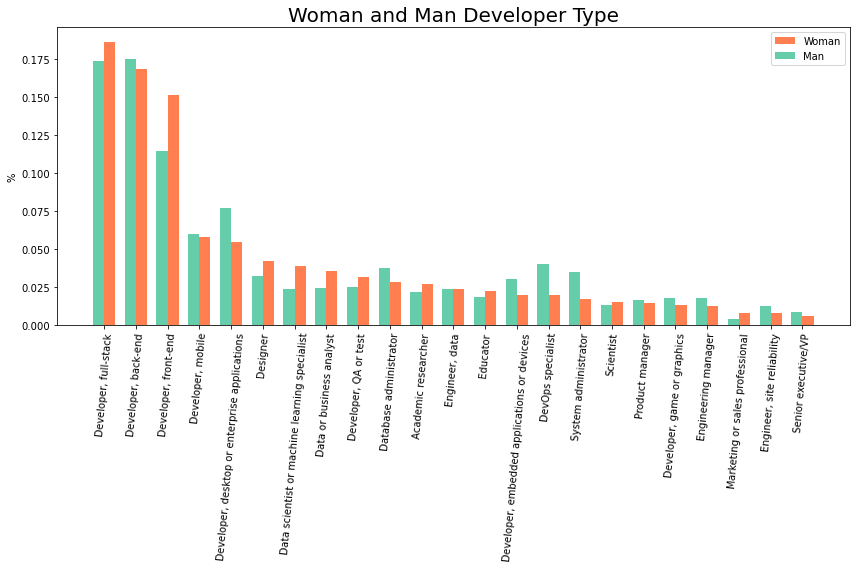

In [97]:
#visualize the comparison between men and women according to their developers type
xticklabels = df_gender_devtype.index

x = np.arange(len(xticklabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [12, 8])
rects1 = ax.bar(x + width/2, df_gender_devtype['WomanPerc'], width, label='Woman', color = 'coral')
rects2 = ax.bar(x - width/2, df_gender_devtype['ManPerc'], width, label='Man', color ='mediumaquamarine' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Woman and Man Developer Type', fontsize = 20)

ax.set_xticks(x)

ax.set_xticklabels(xticklabels, rotation = 85)
ax.legend(fontsize=10)

fig.tight_layout()

plt.show()

Let's take a look at each woman and man to have a better look of the distribution of developer type

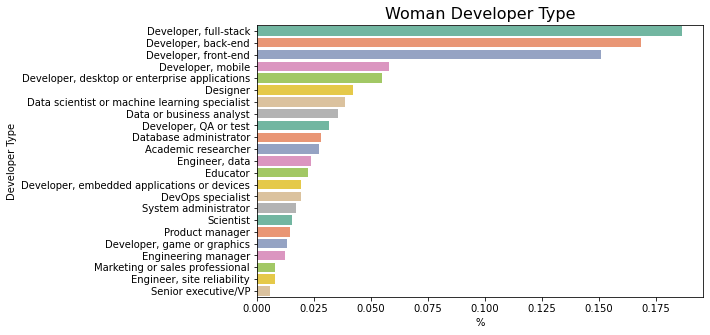

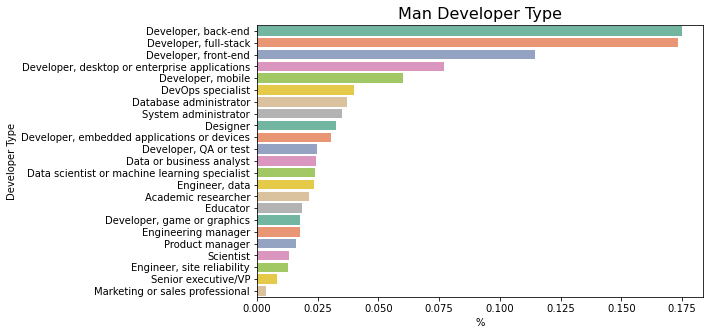

In [206]:
#changing the index into columns to plot it
df_dev_woman_1 =  df_dev_woman.reset_index(level=['DeveloperType'])
df_dev_man_1 =  df_dev_man.reset_index(level=['DeveloperType'])

#visualize dev type of woman
plt.figure(figsize=[8,5])
sns.barplot( y = 'DeveloperType' , x = 'WomanPerc', data = df_dev_woman_1, palette = sns.color_palette("Set2"))
plt.title('Woman Developer Type', fontsize = 16)
plt.ylabel('Developer Type')
plt.xlabel('%')

#visualize dev type of man
plt.figure(figsize=[8,5])
sns.barplot( y = 'DeveloperType' , x = 'ManPerc', data = df_dev_man_1, palette = sns.color_palette("Set2"))
plt.title('Man Developer Type', fontsize = 16)
plt.ylabel('Developer Type')
plt.xlabel('%')

plt.show()

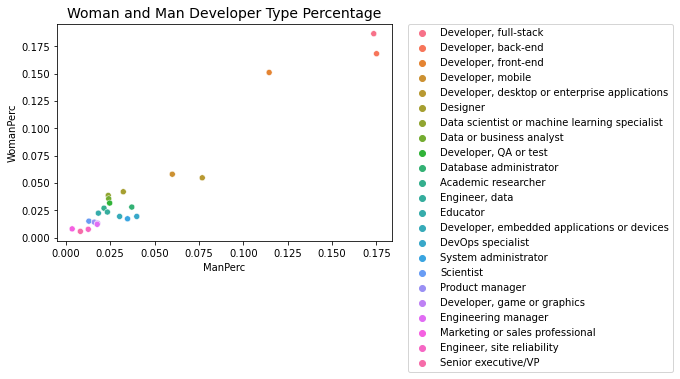

In [99]:
#see the comparison of the percentage of man and woman for each dev type
sns.scatterplot(data=df_gender_devtype, x="ManPerc", y="WomanPerc", hue='DeveloperType')
plt.title('Woman and Man Developer Type Percentage', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The top 3 developer type for both women and men are web developers. For women: full-stack, back-end, and front-end developers while for men: back-end, full-stack and front end developers. The percentage of women who are front end and full stack developers are higher than men, as well as data analyst and data scientist. More men are working devops specialist, system and database administrator compared to women. 

### 3. What are the popular programming languanges used by women and women? How did men’s and women’s answers compare?

#### 3a. Data Preparation

To answer this question, we'll use the LanguageWorkedWith column with a similar approach as question number 2. For data preparation:
- Dealing with missing values
- Select only the ones who identified as Man or Woman
- Separate (parse) the grouped data (LanguageWorkedWith column)


In [100]:
#copying dataframe
df_gen_lang = df.copy()

In [101]:
#check the missing value from the LanguageWorkedWith column
df_lang_mean = df_gen_lang['LanguageWorkedWith'].isnull().mean()
df_lang_sum = df_gen_lang['LanguageWorkedWith'].isnull().sum()

print(df_lang_mean)
print(df_lang_sum)

0.10988039279564388
7083


In [102]:
#check the missing value from the Gender column
df_gen_mean = df_gen_lang['Gender'].isnull().mean()
df_gen_sum = df_gen_lang['Gender'].isnull().sum()

print(df_gen_mean)
print(df_gen_sum)

0.21569631249903043
13904


For the missing values in this question, the same as before, it will be removed because we need the information from both. The question will focus on respondents who identify themselves as only 'Man' and 'Woman' and we will separate them and first.

In [103]:
#grouping the gender column of the dataframes based on man and woman
df_man = df_gen_lang.loc[df_gen_lang['Gender'] == 'Man']
df_woman = df_gen_lang.loc[df_gen_lang['Gender'] == 'Woman']

In [104]:
#removing missing values from languangeworkedwith column for each man and woman df
df_lang_nonull_man = df_man.loc[df_man['LanguageWorkedWith'].isnull() == False]
df_lang_nonull_woman = df_woman.loc[df_woman['LanguageWorkedWith'].isnull() == False]

#checking whether the missing values are still present
df_lang_nonull_man['LanguageWorkedWith'].isnull().mean()
df_lang_nonull_woman['LanguageWorkedWith'].isnull().mean()

0.0

Similar to question 2, to address this question I will :
- Create a list for each man and woman
- Using total_count function to get a dict for each
- Create new df with counts to analyze the trend of the languange used by man
- Create new df with counts to analyze the trend of the languange used by woman

In [105]:
#creating a list of LanguageWorkedWith to be ungrouped
lang_list_man = list(df_lang_nonull_man['LanguageWorkedWith'])
lang_list_woman = list(df_lang_nonull_woman['LanguageWorkedWith'])

In [106]:
#utilizing the function from question 1
lang_dict_man = total_count(lang_list_man)
lang_dict_woman = total_count(lang_list_woman)
lang_dict_man, lang_dict_woman

({'C#': 14707,
  'HTML/CSS': 28669,
  'JavaScript': 31040,
  'Ruby': 3164,
  'SQL': 25176,
  'Java': 18238,
  'Python': 20227,
  'PHP': 11829,
  'Swift': 2708,
  'C': 9798,
  'TypeScript': 11976,
  'Bash/Shell/PowerShell': 15726,
  'Kotlin': 3632,
  'R': 2439,
  'VBA': 2800,
  'Perl': 1424,
  'Objective-C': 1856,
  'Scala': 1646,
  'C++': 10830,
  'Go': 4128,
  'Haskell': 922,
  'Rust': 2448,
  'Dart': 1840,
  'Assembly': 2737,
  'Julia': 372},
 {'HTML/CSS': 2538,
  'Java': 1446,
  'JavaScript': 2532,
  'Ruby': 325,
  'C': 637,
  'C#': 969,
  'C++': 733,
  'PHP': 905,
  'Python': 1581,
  'SQL': 2104,
  'TypeScript': 812,
  'Bash/Shell/PowerShell': 1050,
  'Julia': 30,
  'R': 359,
  'Go': 214,
  'Swift': 221,
  'Kotlin': 223,
  'Rust': 80,
  'VBA': 191,
  'Objective-C': 137,
  'Assembly': 216,
  'Dart': 78,
  'Scala': 134,
  'Perl': 92,
  'Haskell': 61})

In [107]:
#creating languange dataframe with its count - Female
df_lang_woman = pd.DataFrame(pd.Series(lang_dict_woman)).reset_index()
df_lang_woman.columns = ['Language', 'WomanCount']
df_lang_woman.sort_values('WomanCount', ascending=False, inplace=True)

#creating languange dataframe with its count - Male
df_lang_man = pd.DataFrame(pd.Series(lang_dict_man)).reset_index()
df_lang_man.columns = ['Language', 'ManCount']
df_lang_man.sort_values('ManCount', ascending=False, inplace=True)

In [108]:
#setting languange as the index
df_lang_woman = df_lang_woman.set_index('Language')
df_lang_man = df_lang_man.set_index('Language')

In [109]:
#creating percentage column to the dataframe
df_lang_woman['WomanPerc'] = df_lang_woman['WomanCount']/np.sum(df_lang_woman['WomanCount'])
df_lang_man['ManPerc'] = df_lang_man['ManCount']/np.sum(df_lang_man['ManCount'])

In [110]:
#merge the data
df_gender_lang = pd.merge(df_lang_man, df_lang_woman, left_index=True, right_index=True)

#difference between man and woman percentage
df_gender_lang['Diff_GenLang_Perc'] = df_gender_lang['ManPerc'] - df_gender_lang['WomanPerc']

#### 3b. Data Evaluation

In [111]:
#developer type column with the count and percentage
df_gender_lang.style.bar(subset=['Diff_GenLang_Perc'], align='mid', color=['#d65f5f', '#5fba7d'])


,ManCount,ManPerc,WomanCount,WomanPerc,Diff_GenLang_Perc
Language,,,,,
JavaScript,31040,0.134762,2532,0.143310,-0.008548
HTML/CSS,28669,0.124468,2538,0.143650,-0.019181
SQL,25176,0.109303,2104,0.119085,-0.009782
Python,20227,0.087817,1581,0.089484,-0.001667
Java,18238,0.079181,1446,0.081843,-0.002662
Bash/Shell/PowerShell,15726,0.068275,1050,0.059429,0.008846
C#,14707,0.063851,969,0.054845,0.009006
TypeScript,11976,0.051995,812,0.045959,0.006036
PHP,11829,0.051356,905,0.051223,0.000134


The percentage of women who use JavaScript, HTML/CSS, SQL, Python, Java, Ruby and R are higher than the percentage of men. While the percentage of men are higher for  Bash, C#, Typescript, C++, C, Go, Kotlin, Rust.  

In [112]:
#sort values by woman percentgae
df_gender_lang.sort_values('WomanPerc', ascending=False, inplace=True)

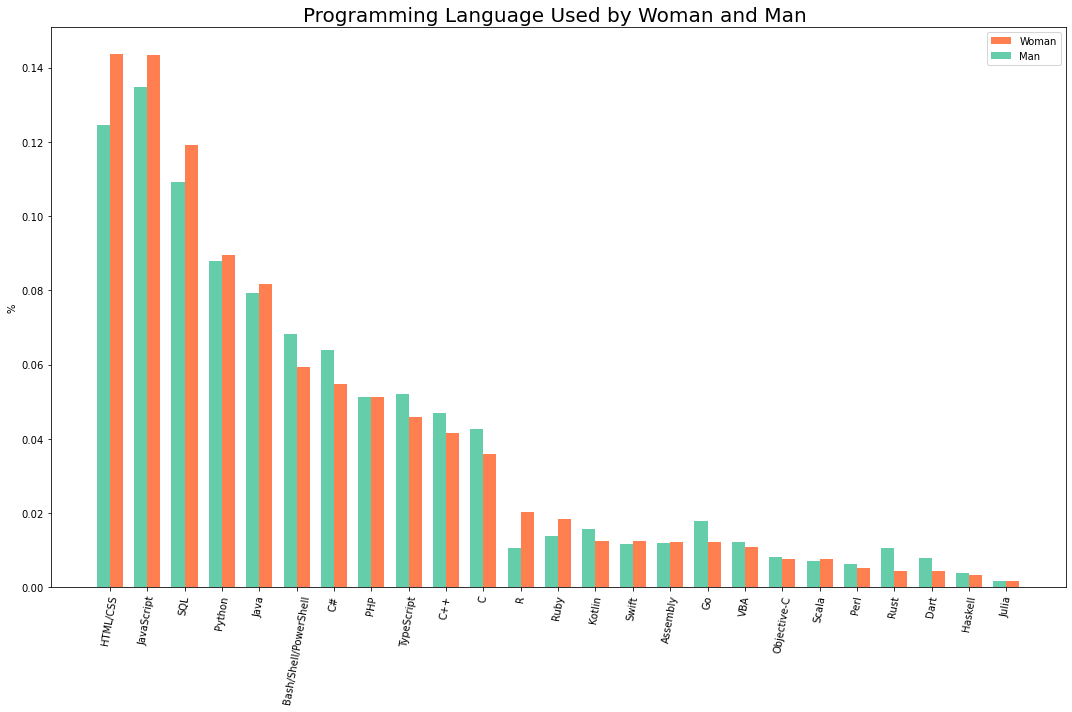

In [113]:
#visualize the comparison between men and women according to their developers type
xticklabels = df_gender_lang.index

x = np.arange(len(xticklabels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [15, 10])
rects1 = ax.bar(x + width/2, df_gender_lang['WomanPerc'], width, label='Woman', color = 'coral')
rects2 = ax.bar(x - width/2, df_gender_lang['ManPerc'], width, label='Man', color ='mediumaquamarine' )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Programming Language Used by Woman and Man ', fontsize = 20)

ax.set_xticks(x)

ax.set_xticklabels(xticklabels, rotation = 80)
ax.legend(fontsize=10)

fig.tight_layout()

plt.show()

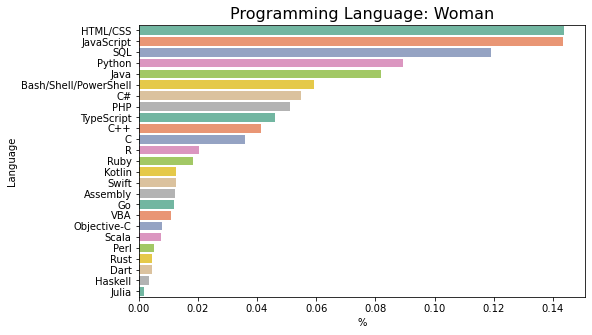

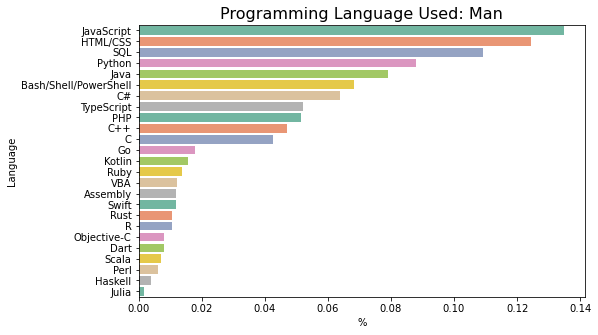

In [207]:
#changing the index into columns to plot it
df_lang_woman_1 =  df_lang_woman.reset_index(level=['Language'])
df_lang_man_1 =  df_lang_man.reset_index(level=['Language'])

#visualize dev type of woman
plt.figure(figsize=[8,5])
sns.barplot( y = 'Language' , x = 'WomanPerc', data = df_lang_woman_1, palette = sns.color_palette("Set2"))
plt.title('Programming Language: Woman', fontsize = 16)
plt.ylabel('Language')
plt.xlabel('%')

#visualize dev type of man
plt.figure(figsize=[8,5])
sns.barplot( y = 'Language' , x = 'ManPerc', data = df_lang_man_1, palette = sns.color_palette("Set2"))
plt.title('Programming Language Used: Man', fontsize = 16)
plt.ylabel('Language')
plt.xlabel('%')

plt.show()

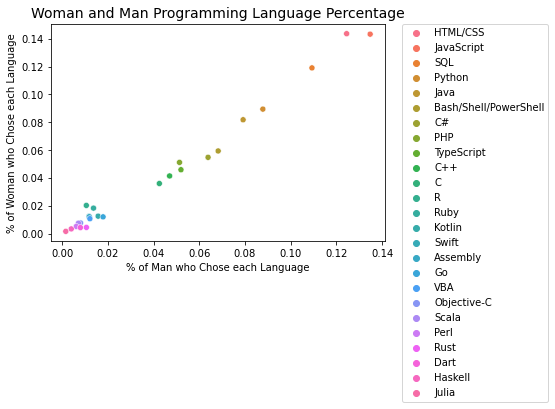

In [115]:
#see the comparison of the percentage of man and woman for each dev type
sns.scatterplot(data=df_gender_lang, x="ManPerc", y="WomanPerc", hue='Language')
plt.title('Woman and Man Programming Language Percentage', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('% of Woman who Chose each Language')
plt.xlabel('% of Man who Chose each Language')
plt.show()

The most popular language for developers are JavaScript, HTML/CSS, and SQL; HMTL/CSS is the most used by women and JavaScript for men. From the last figure, the language appears to be linear, indicating that the overall pattern of language choices by women and men are similar.

### 4. How does women and men salary differ between each other?

For this question, we'll take a look at the salary of man and woman in tech. Further, we'll also analyze other factors such as education level, developer type, and language used and how it might affect salary for man and woman.

#### 4a. Data Preparation

For the data preparation:
- Dealing with the missing values
- Take only the ones who identified as Man or Woman
- Select only the one who are working/part-time/used to work as developers.
- Separate (parse) the grouped data


In [116]:
#copying dataframe
df_sal = df.copy()

In [117]:
#check the missing value from the Gender
gender_null_mean = df_sal['Gender'].isnull().mean()
gender_null_sum = df_sal['Gender'].isnull().sum()

#check the missing value from the EdLevel
ed_null_mean = df_sal['EdLevel'].isnull().mean()
ed_null_sum = df_sal['EdLevel'].isnull().sum()


#check the missing value from the MainBranch
main_null_mean = df_sal['MainBranch'].isnull().mean()
main_null_sum = df_sal['MainBranch'].isnull().sum()


#check the missing value from the DevType
dev_null_mean = df_sal['DevType'].isnull().mean()
dev_null_sum = df_sal['DevType'].isnull().sum()


#check the missing value from the LanguageWorkedWith
lang_null_mean = df_sal['LanguageWorkedWith'].isnull().mean()
lang_null_sum = df_sal['LanguageWorkedWith'].isnull().sum()

#check the missing value from the YearsCodePro
years_null_mean = df_sal['YearsCodePro'].isnull().mean()
years_null_sum = df_sal['YearsCodePro'].isnull().sum()

#check the missing value from the ConvertedComp (salary in USD)
sal_null_mean = df_sal['ConvertedComp'].isnull().mean()
sal_null_sum = df_sal['ConvertedComp'].isnull().sum()

print('gender_null:', gender_null_mean, gender_null_sum)
print('ed_null:', ed_null_mean, ed_null_sum)
print('main_null:', main_null_mean, main_null_sum)
print('dev_null:', dev_null_mean, dev_null_sum)
print('lang_null:', lang_null_mean, lang_null_sum)
print('sal_null:', sal_null_mean, sal_null_sum)
print('years_null:', years_null_mean, years_null_sum)

gender_null: 0.21569631249903043 13904
ed_null: 0.10905819022354601 7030
main_null: 0.004638463567118102 299
dev_null: 0.23411054746280696 15091
lang_null: 0.10988039279564388 7083
sal_null: 0.4608212717767332 29705
years_null: 0.28097609407238483 18112


In this question, I think it's appropriate to remove the missing values from all the variables we want to see the relationship with salary and gender. 

In [118]:
df_gensal_nonull = df_sal.loc[df_sal['MainBranch'].isnull() == False]
df_gensal_nonull['MainBranch'].isnull().mean()

0.0

In [119]:
df_gensal_nonull = df_gensal_nonull.loc[df_sal['Gender'].isnull() == False]
df_gensal_nonull['Gender'].isnull().mean()

0.0

In analyzing salary, I'll select respondents who have jobs as developer, who had jobs as developer, and who code as part of their work.

In [120]:
df_gensal_nonull = df_gensal_nonull.loc[(df_gensal_nonull['MainBranch'] == 'I am a developer by profession') | \
                                  (df_gensal_nonull['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work') |\
                                         (df_gensal_nonull['MainBranch'] == 'I used to be a developer by profession, but no longer am')]

In [121]:
df_gensal_nonull = df_gensal_nonull.loc[(df_gensal_nonull['Gender'] == 'Woman') | (df_gensal_nonull['Gender'] == 'Man')]

In [122]:
df_woman_gensal = df_gensal_nonull[df_gensal_nonull['Gender']== 'Woman']
df_man_gensal = df_gensal_nonull[df_gensal_nonull['Gender']== 'Man']

I'd like to see the comparison on how much and and woman earn in general

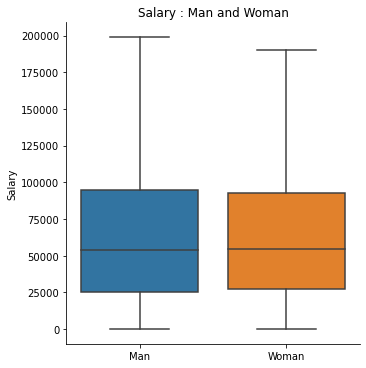

In [123]:
sns.catplot(x="Gender", y="ConvertedComp", kind="box", data=df_gensal_nonull, showfliers = False)
plt.title('Salary : Man and Woman')
plt.xlabel('')
plt.ylabel('Salary')
plt.show()

Generally, the median is pretty close.

In [124]:
df_man_gensal.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,38969.000000,35144.000000,2.949600e+04,2.943700e+04,34542.000000
mean,28440.621032,32.237915,3.414358e+08,1.036159e+05,40.827825
std,18572.985605,9.105201,5.822622e+10,2.257800e+05,17.269841
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,12666.000000,26.000000,2.000000e+04,2.516400e+04,40.000000
50%,25476.000000,30.000000,6.400000e+04,5.404900e+04,40.000000
75%,47033.000000,37.000000,1.250000e+05,9.500000e+04,44.000000
max,65629.000000,279.000000,1.000000e+13,2.000000e+06,475.000000


In [125]:
df_woman_gensal.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,3184.000000,2804.000000,2.277000e+03,2.274000e+03,2728.000000
mean,31499.422425,30.995899,5.675897e+05,9.830048e+04,39.566129
std,18529.174049,8.160126,5.423378e+06,2.139110e+05,16.666769
min,56.000000,15.000000,0.000000e+00,0.000000e+00,1.000000
25%,15066.500000,25.000000,1.900000e+04,2.761200e+04,38.000000
50%,30978.000000,29.000000,6.000000e+04,5.463200e+04,40.000000
75%,48712.500000,35.000000,1.100000e+05,9.260150e+04,40.000000
max,64938.000000,72.000000,1.700000e+08,2.000000e+06,385.000000


Between men and women salary, the median and mean are quite close.

#### a. Developer Type and Salary

Similar to before, to prepare the data, we'll:
- Deal with missing values
- Selecting man and woman respondents, respondents who are/were developers
- Create a list
- Use total_function to parse the data
- Create a dictionary
- Choose columns that we want to analyze
- Create function to iterate over the created dictionary, find a value from another, and concat them with another value
- Melt the data


In [126]:
df_gensal_nonull['DevType'].isnull().mean()

0.041325647047659717

In [127]:
df_gensal_nonull = df_sal.loc[df_sal['DevType'].isnull() == False]


In [128]:
df_gensal_nonull['DevType'].isnull().mean()

0.0

In [129]:
#removing missing values from gender column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['Gender'].isnull() == False]
df_gensal_nonull['Gender'].isnull().mean()

0.0

In [130]:
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['ConvertedComp'].isnull() == False]
df_gensal_nonull['ConvertedComp'].isnull().mean()

0.0

In [131]:
#creating a list of DevType values to be ungrouped
sal_dev_list= list(df_gensal_nonull['DevType'])

In [132]:
sal_dev_dict = total_count(sal_dev_list)

In [133]:
#selecting the columns
df_gen_dev_sal = df_gensal_nonull.loc[:,['ConvertedComp', 'DevType']]

##### Function to iterate and find value from another

In [134]:
#function to iterate over the created dictionary, find a value from another, and concat them with another value
def iterate_concat(df, col1, col2, dict):
    '''
    INPUT:
    df - a dataframe which has the columns that we want to use 
    col1 - a column that we want to iterate and find value from
    col2 - a column that will be concat to the 1st one
    dict - a dictionary that we want to search from
    
    OUTPUT:
    df - a new dataframe with each variable from  dictionary key
    '''
    for i in dict.keys():
        df[i] = df[df[col1].str.contains(i, regex=False)][col2]
    #df.drop([col1, col2], axis = 1, inplace=True)
    return df

In [135]:
#concat the data
df_gen_dev_sal = iterate_concat(df_gen_dev_sal,'DevType','ConvertedComp', sal_dev_dict)

#observing the concatenated data
df_gen_dev_sal

,ConvertedComp,DevType,"Developer, back-end","Developer, desktop or enterprise applications","Developer, game or graphics",Database administrator,"Developer, full-stack","Developer, mobile","Developer, embedded applications or devices","Developer, front-end",...,Data scientist or machine learning specialist,Engineering manager,Product manager,"Engineer, data",Scientist,Educator,Senior executive/VP,Academic researcher,"Engineer, site reliability",Marketing or sales professional
7,116000.0,"Developer, back-end;Developer, desktop or ente...",116000.0,116000.0,116000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,32315.0,"Database administrator;Developer, full-stack;D...",NaN,NaN,NaN,32315.0,32315.0,32315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,40070.0,"Developer, back-end;Developer, desktop or ente...",40070.0,40070.0,NaN,NaN,NaN,NaN,40070.0,40070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,14268.0,"Designer;Developer, front-end",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,38916.0,"Designer;Developer, back-end",38916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63457,7764.0,"Developer, front-end",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63517,59454.0,"Developer, back-end;DevOps specialist",59454.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63955,9612.0,"Academic researcher;Designer;Developer, full-s...",NaN,NaN,NaN,NaN,9612.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9612.0,NaN,NaN
64111,2508.0,"Developer, back-end",2508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#drop unnecessary columns,  since there are each dev type column now
df_gen_dev_sal.drop(['ConvertedComp', 'DevType'], axis = 1, inplace=True)

In [137]:
df_gen_dev_sal_sort = df_gen_dev_sal[df_gen_dev_sal.median().sort_values(ascending=False).index]

In [208]:
#create a gender column
df_gen_dev_sal_sort['gender_col'] = df_gensal_nonull['Gender']

In [139]:
#melt the df - unpivot a DataFrame from wide to long format
df_gen_dev_sal_melt = pd.melt(df_gen_dev_sal_sort, 'gender_col', var_name = "DevType", value_name ="ConvertedComp")

In [140]:
#selecting man and woman from gender column
df_gen_dev_sal_melt = df_gen_dev_sal_melt.loc[(df_gen_dev_sal_melt['gender_col'] == 'Woman') | (df_gen_dev_sal_melt['gender_col'] == 'Man')]

#check again and remove missing values from the new df
df_gen_dev_sal_comp = df_gen_dev_sal_melt.dropna()


In [141]:
#separating man and woman data to plot later
df_gen_dev_sal_woman = df_gen_dev_sal_comp[df_gen_dev_sal_comp['gender_col']== 'Woman']
df_gen_dev_sal_man = df_gen_dev_sal_comp[df_gen_dev_sal_comp['gender_col']== 'Man']

##### b. Programming Language and Salary

Similar to before, to prepare the data, we'll:
- Deal with missing values
- Selecting man and woman respondents, respondents who are/were developers
- Create a list
- Use total_function to parse the data
- Create a dictionary
- Choose columns that we want to analyze
- Create function to iterate over the created dictionary, find a value from another, and concat them with another value
- Melt the data


In [142]:
#checking missing values
df_gensal_nonull['LanguageWorkedWith'].isnull().mean()

0.005222260672602007

In [143]:
#removing missing values
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['LanguageWorkedWith'].isnull() == False]

#checking missing values again
df_gensal_nonull['LanguageWorkedWith'].isnull().mean()

0.0

In [144]:
#removing missing values from gender column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['Gender'].isnull() == False]
df_gensal_nonull['Gender'].isnull().mean()

0.0

In [145]:
#removing missing vales from convertecomp column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['ConvertedComp'].isnull() == False]
df_gensal_nonull['ConvertedComp'].isnull().mean()

0.0

In [146]:
df_gensal_nonull = df_gensal_nonull.loc[(df_gensal_nonull['Gender'] == 'Woman') | (df_gensal_nonull['Gender'] == 'Man')]

In [147]:
#selecting only developers
df_gensal_nonull = df_gensal_nonull.loc[(df_gensal_nonull['MainBranch'] == 'I am a developer by profession') | \
                                  (df_gensal_nonull['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work') |\
                                         (df_gensal_nonull['MainBranch'] == 'I used to be a developer by profession, but no longer am')]

In [148]:
#creating a list of LanguageWorkedWith  to be ungrouped
sal_lang_list= list(df_gensal_nonull['LanguageWorkedWith'])

In [149]:
#utilizing total_count function and get a dictionary 
sal_lang_dict = total_count(sal_lang_list)

In [150]:
#selecting the columns to be analyzed
df_gen_lang_sal = df_gensal_nonull.loc[:,['ConvertedComp', 'LanguageWorkedWith']]

In [151]:
#utilizing iterate_concat function
df_gen_lang_sal = iterate_concat(df_gen_lang_sal,'LanguageWorkedWith','ConvertedComp', sal_lang_dict)

#drop the unused column, since there are columns for each language now
df_gen_lang_sal.drop(['ConvertedComp', 'LanguageWorkedWith'], axis = 1, inplace=True)

#adding gender column to the new df
df_gen_lang_sal['gender_col'] = df_gensal_nonull['Gender']

#melt the df -  unpivot a DataFrame from wide to long format
df_gen_lang_sal_melt = pd.melt(df_gen_lang_sal, 'gender_col', var_name = "LanguageWorkedWith", value_name ="ConvertedComp")


In [152]:
#selecting man and woman from gender column
df_gen_lang_sal_melt = df_gen_lang_sal_melt.loc[(df_gen_lang_sal_melt['gender_col'] == 'Woman') | (df_gen_lang_sal_melt['gender_col'] == 'Man')]

#check again and remove missing values from the new df
df_gen_lang_sal_comp = df_gen_lang_sal_melt.dropna()



In [153]:
#separating man and woman data to plot later
df_gen_lang_sal_woman = df_gen_lang_sal_comp[df_gen_lang_sal_comp['gender_col']== 'Woman']
df_gen_lang_sal_man = df_gen_lang_sal_comp[df_gen_lang_sal_comp['gender_col']== 'Man']

##### c. Education Level and Salary

Since the education level data is not cluttered, to prepare the data, we'll:
- Deal with missing values
- Selecting man and woman respondents, respondents who are/were developers


In [154]:
#checking missing values
df_gensal_nonull['EdLevel'].isnull().mean()

0.015597975786304528

In [155]:
#removing missing values
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['EdLevel'].isnull() == False]

#checking for missing values again
df_gensal_nonull['EdLevel'].isnull().mean()

0.0

In [156]:
#removing missing values from gender column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['Gender'].isnull() == False]
df_gensal_nonull['Gender'].isnull().mean()

0.0

In [157]:
#removing missing vales from convertecomp column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['ConvertedComp'].isnull() == False]
df_gensal_nonull['ConvertedComp'].isnull().mean()

0.0

In [158]:
#selecting only developers
df_gensal_nonull = df_gensal_nonull.loc[(df_gensal_nonull['MainBranch'] == 'I am a developer by profession') | \
                                  (df_gensal_nonull['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work') |\
                                         (df_gensal_nonull['MainBranch'] == 'I used to be a developer by profession, but no longer am')]

In [159]:
df_gensal_nonull = df_gensal_nonull.loc[(df_gensal_nonull['Gender'] == 'Woman') | (df_gensal_nonull['Gender'] == 'Man')]

In [160]:
#separating mand and woman data for education level
df_man_ed = df_gensal_nonull[df_gensal_nonull['Gender']== 'Man']
df_woman_ed = df_gensal_nonull[df_gensal_nonull['Gender']== 'Woman']

#### d. Years of Coding Pro and Salary

For this question, the column used is YearsCodePro since we want to look at their salary, so we'll analyze respondents who code for work (profesionally)
Since the YearsCodePro data is not cluttered, to prepare the data, we'll:
- Deal with missing values
- Selecting man and woman respondents, respondents who are/were developers
- Categorizing years of experience


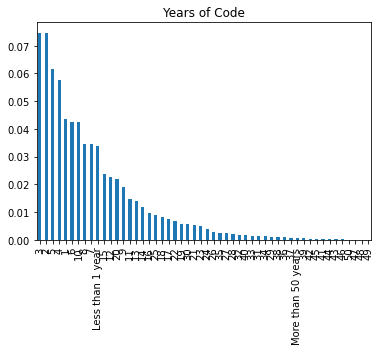

In [161]:
#plotting the ratio of YearsCodePro column to see the distribution 
yrs_df = df_sal['YearsCodePro'].value_counts()
(yrs_df/df_sal.shape[0]).plot(kind="bar");
plt.title("Years of Code");

In [162]:
#checking missing values
df_gensal_nonull['YearsCodePro'].isnull().mean()

0.003156011062306816

In [163]:
#removing missing values
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['YearsCodePro'].isnull() == False]

#checking for missing values again
df_gensal_nonull['YearsCodePro'].isnull().mean()

0.0

In [164]:
#removing missing values from gender column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['Gender'].isnull() == False]
df_gensal_nonull['Gender'].isnull().mean()

0.0

In [165]:
#removing missing vales from convertecomp column
df_gensal_nonull = df_gensal_nonull.loc[df_gensal_nonull['ConvertedComp'].isnull() == False]
df_gensal_nonull['ConvertedComp'].isnull().mean()

0.0

In [166]:
#selecting only developers
df_gensal_yrs = df_gensal_nonull.loc[(df_gensal_nonull['MainBranch'] == 'I am a developer by profession') | \
                                  (df_gensal_nonull['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work') |\
                                         (df_gensal_nonull['MainBranch'] == 'I used to be a developer by profession, but no longer am')]

In [167]:
df_gensal_yrs = df_gensal_nonull.loc[(df_gensal_nonull['Gender'] == 'Woman') | (df_gensal_nonull['Gender'] == 'Man')]

There are a range of years listed and for this question purpose, it will be categorized to simplify them

In [168]:
#Reducing the no of categoties for YearsCodePro
df_gensal_yrs["YearsCodePro"].replace(['Less than 1 year'],'< 1',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['1','2','3','4','5'],'1-5',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['6','7','8','9','10'],'6-10',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['11','12','13','14','15'],'11-15',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['16','17','18','19','20'],'16-20',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['21','22','23','24','25'],'21-25',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['26','27','28','29','30'],'26-30',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['31','32','33','34','35'],'31-35',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['36','37','38','39','40'],'36-40',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['41','42','43','44','45'],'41-45',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['46','47','48','49','50'],'46-50',inplace = True)
df_gensal_yrs["YearsCodePro"].replace(['More than 50 years'],'> 50',inplace = True)

In [169]:
#separating man and woman data for plotting later
df_woman_yrs = df_gensal_yrs[df_gensal_yrs['Gender']== 'Woman']
df_man_yrs = df_gensal_yrs[df_gensal_yrs['Gender']== 'Man']

#### 4b. Data Evaluation

##### a. Developer Type and Salary

In [170]:
#observing the new dataframe
df_gen_dev_sal_comp

,gender_col,DevType,ConvertedComp
16,Man,Engineering manager,97288.0
45,Man,Engineering manager,41568.0
85,Man,Engineering manager,170000.0
93,Man,Engineering manager,130000.0
111,Man,Engineering manager,90000.0
...,...,...,...
731004,Man,Academic researcher,16000.0
731006,Man,Academic researcher,27492.0
731009,Woman,Academic researcher,121500.0
731014,Man,Academic researcher,34591.0


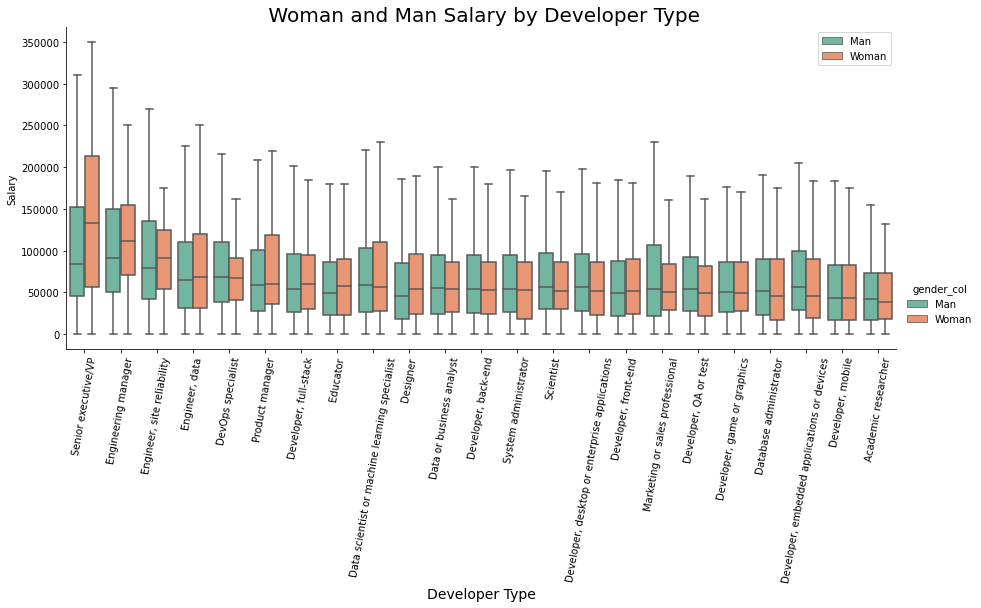

In [171]:
#visualize the data developer type data to compare between man and woman salary
sns.catplot(x="DevType", hue="gender_col", y="ConvertedComp", kind = "box", data=df_gen_dev_sal_comp, palette = sns.color_palette("Set2"), aspect=10/4, showfliers=False, order = ['Senior executive/VP', 'Engineering manager', 'Engineer, site reliability','Engineer, data','DevOps specialist', 'Product manager', 'Developer, full-stack','Educator','Data scientist or machine learning specialist','Designer','Data or business analyst','Developer, back-end','System administrator','Scientist','Developer, desktop or enterprise applications','Developer, front-end','Marketing or sales professional','Developer, QA or test','Developer, game or graphics','Database administrator','Developer, embedded applications or devices','Developer, mobile','Academic researcher'] )
plt.xticks(rotation = 80)
plt.title(' Woman and Man Salary by Developer Type', fontsize = 20)
plt.xlabel('Developer Type', fontsize=14)
plt.ylabel('Salary')
plt.legend(title='', loc='upper right') 
plt.show()

To sort the woman and man dataframe based on the median salary:
- Using groupby function to make devtype and gender as index and sort convertcomp by median value
- Making it into columns
- Sort them based on convertedcomp (already sorted by median)

In [172]:
df_gen_dev_sal_woman_grouped = df_gen_dev_sal_woman.groupby(["DevType", "gender_col"]).median()
#df_gen_dev_sal_woman_grouped
df_gen_dev_sal_man_grouped = df_gen_dev_sal_man.groupby(["DevType", "gender_col"]).median()
#df_gen_dev_sal_man_grouped

In [173]:
#changing the index into columns so that it can be plotted
df_gen_dev_sal_woman_grouped =  df_gen_dev_sal_woman_grouped.reset_index(level=['DevType', 'gender_col'])
df_gen_dev_sal_man_grouped =  df_gen_dev_sal_man_grouped.reset_index(level=['DevType', 'gender_col'])

In [174]:
#sort values based one median salary
df_woman_sal_dev_sorted = df_gen_dev_sal_woman_grouped.sort_values('ConvertedComp', ascending = False)
df_man_sal_dev_sorted = df_gen_dev_sal_man_grouped.sort_values('ConvertedComp', ascending = False)

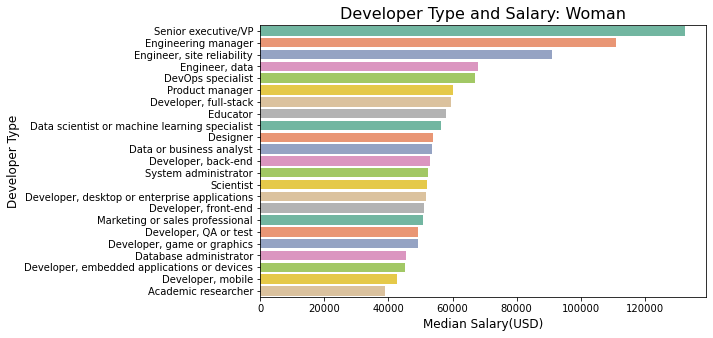

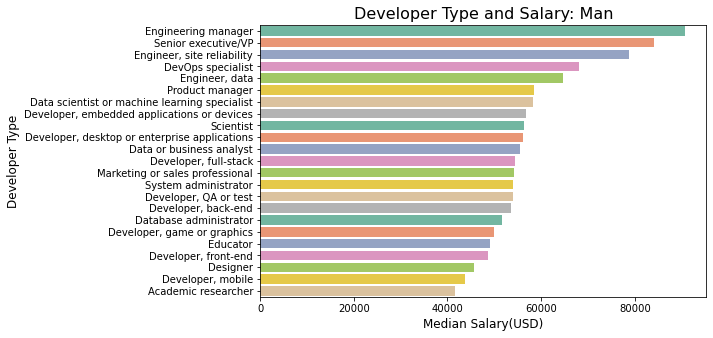

In [209]:
#plot median salary per developer type: man
from numpy import median, mean
plt.figure(figsize=[8,5])
sns.barplot( y = 'DevType' , x = 'ConvertedComp', data = df_woman_sal_dev_sorted, palette = sns.color_palette("Set2"))
plt.title('Developer Type and Salary: Woman', fontsize = 16)
plt.xlabel("Median Salary(USD)", fontsize=12)
plt.ylabel('Developer Type',fontsize=12)

#plot median salary per developer type: woman
plt.figure(figsize=[8,5])
sns.barplot( y = 'DevType' , x = 'ConvertedComp', estimator = median, data = df_man_sal_dev_sorted, palette = sns.color_palette("Set2") )
plt.title('Developer Type and Salary: Man', fontsize = 16)
plt.xlabel("Median Salary(USD)", fontsize=12)
plt.ylabel('Developer Type',fontsize=12)

plt.show()



The top 3 highest median salary are senior executive/vp, engineering manager and site reliability engineer. For women, the first one is senior executive while for men, it is engineering manager.The median is considerably higher for  women who work as senior executive, engineering manager and SRE. Women and men earn more or less the same for popular developer type such as full-stack and front-end developers as well as for data scientist or data analyst which are more popular in women.

##### b. Programming Language and Salary

In [176]:
#observing the new dataframe
df_gen_lang_sal_comp

,gender_col,LanguageWorkedWith,ConvertedComp
0,Man,Python,116000.0
1,Man,Python,32315.0
4,Man,Python,38916.0
7,Man,Python,79000.0
11,Man,Python,71093.0
...,...,...,...
779563,Man,Julia,31816.0
779632,Man,Julia,42564.0
780142,Man,Julia,12372.0
780150,Man,Julia,83770.0


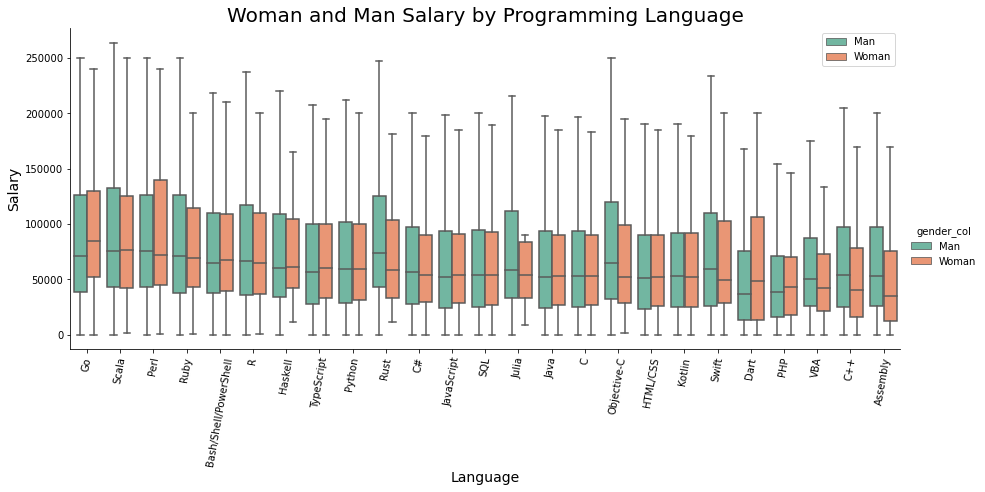

In [212]:
sns.catplot(x="LanguageWorkedWith", hue="gender_col", y="ConvertedComp", kind = "box", data=df_gen_lang_sal_comp,  palette = sns.color_palette("Set2"), aspect=10/4, showfliers=False, order = 
['Go','Scala','Perl','Ruby','Bash/Shell/PowerShell','R','Haskell','TypeScript','Python','Rust','C#','JavaScript','SQL','Julia','Java','C','Objective-C','HTML/CSS','Kotlin','Swift','Dart','PHP','VBA','C++','Assembly'])
plt.xticks(rotation = 80)
plt.title('Woman and Man Salary by Programming Language', fontsize = 20)
plt.legend(title='', loc='upper right') 
plt.xlabel('Language', fontsize=14)
plt.ylabel('Salary',  fontsize=14)
plt.show()

To sort the woman and man dataframe based on the median salary:
- Using groupby function to make devtype and gender as index and sort convertcomp by median value
- Making it into columns
- Sort them based on convertedcomp (already sorted by median)

In [178]:
df_gen_lang_sal_woman_grouped = df_gen_lang_sal_woman.groupby(["LanguageWorkedWith", "gender_col"]).median()
df_gen_lang_sal_man_grouped = df_gen_lang_sal_man.groupby(["LanguageWorkedWith", "gender_col"]).median()

In [179]:
#changing the index into columns so that it can be plotted
df_gen_lang_sal_woman_grouped =  df_gen_lang_sal_woman_grouped.reset_index(level=['LanguageWorkedWith', 'gender_col'])
df_gen_lang_sal_man_grouped =  df_gen_lang_sal_man_grouped.reset_index(level=['LanguageWorkedWith', 'gender_col'])

In [180]:
#sort by salary
df_woman_sal_lang_sorted = df_gen_lang_sal_woman_grouped.sort_values('ConvertedComp', ascending = False)
df_man_sal_lang_sorted = df_gen_lang_sal_man_grouped.sort_values('ConvertedComp', ascending = False)

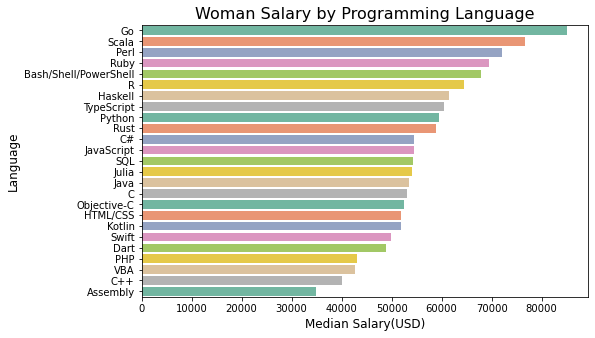

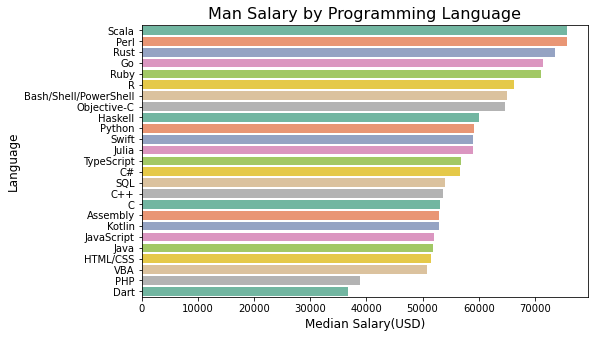

In [210]:

#plot median salary per education level: woman
from numpy import median, mean
plt.figure(figsize=[8,5])
sns.barplot( y = 'LanguageWorkedWith' , x = 'ConvertedComp', estimator = median, palette = sns.color_palette("Set2"), data = df_woman_sal_lang_sorted)
plt.title('Woman Salary by Programming Language', fontsize = 16)
plt.xlabel("Median Salary(USD)", fontsize=12)
plt.ylabel('Language',fontsize=12)


#Plot median salary per education level: man
plt.figure(figsize=[8,5])
sns.barplot( y = 'LanguageWorkedWith' , x = 'ConvertedComp', estimator = median, palette = sns.color_palette("Set2"), data = df_man_sal_lang_sorted)
plt.title('Man Salary by Programming Language', fontsize = 16)
plt.xlabel("Median Salary(USD)", fontsize=12)
plt.ylabel('Language',fontsize=12)

plt.show()


In [182]:
df_woman_sal_lang_sorted

,LanguageWorkedWith,gender_col,ConvertedComp
6,Go,Woman,85000.0
21,Scala,Woman,76750.0
15,Perl,Woman,72000.0
18,Ruby,Woman,69364.0
1,Bash/Shell/PowerShell,Woman,67861.0
17,R,Woman,64458.5
8,Haskell,Woman,61513.0
23,TypeScript,Woman,60500.0
16,Python,Woman,59454.0
19,Rust,Woman,58813.0


For women who use Go, Scala, and Pearl have highest median salary. While for men, it is the one who use Scala, Perl and Rust. Although JavaScript, HTML/CSS, SQL are the most popular language but they have lower median salary than the less popular ones. Also, the percentage of men who use Go is higher than women, but women who use Go earn more than men. 

#### c. Education Level and Salary

In [183]:
#observing the data 
df_gensal_nonull

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63402,64810,I am a developer by profession,Yes,32.0,12,Yearly,74500.0,74500.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Flask;jQuery;React.js;Vue.js,Angular;ASP.NET Core;Django;jQuery,Just as welcome now as I felt last year,35.0,19,7
63457,64872,I am a developer by profession,Yes,NaN,13,Monthly,2200000.0,7764.0,Colombia,Colombian peso,...,NaN,NaN,NaN,Web development or web design,Django;Express;Flask;React.js,jQuery,A lot more welcome now than last year,43.0,17,13
63517,64938,I am a developer by profession,No,33.0,13,Yearly,55000.0,59454.0,France,European Euro,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask;jQuery;Ruby on Rails,Just as welcome now as I felt last year,40.0,20,12
63955,65414,I am a developer by profession,Yes,22.0,17,Monthly,30000.0,9612.0,Mauritius,Mauritian rupee,...,Difficult,Too long,No,"Computer science, computer engineering, or sof...",Angular;Django,Gatsby;jQuery;Laravel;React.js,Just as welcome now as I felt last year,40.0,5,3


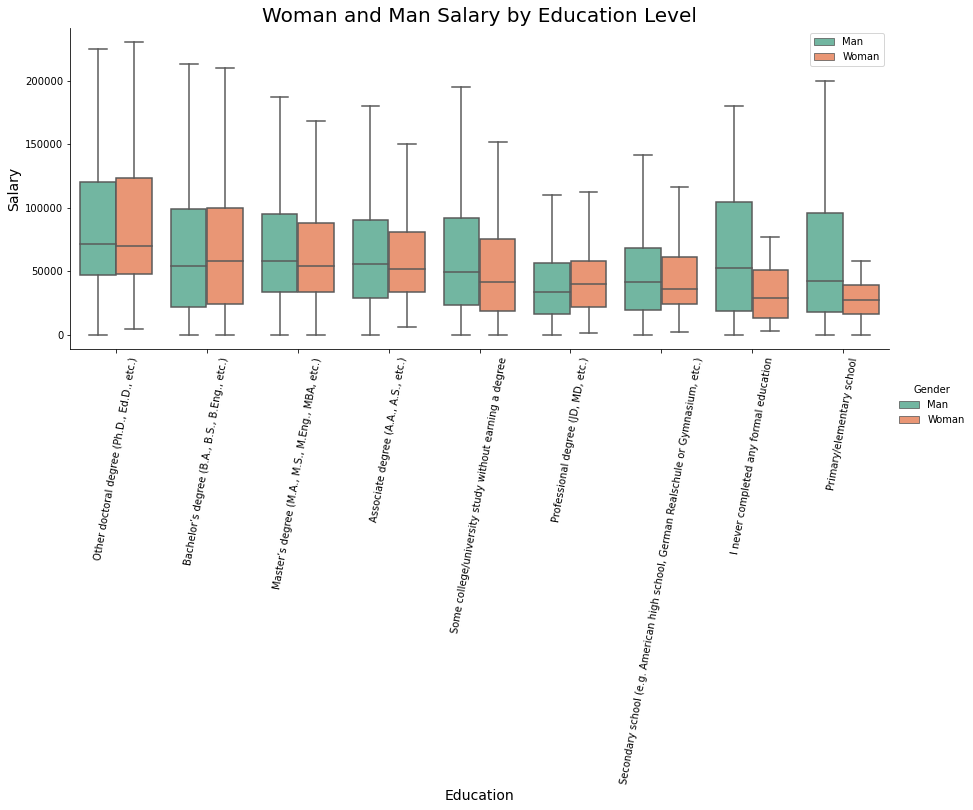

In [184]:
sns.catplot(x="EdLevel", hue="Gender", y="ConvertedComp", kind = "box", data=df_gensal_nonull,  palette = sns.color_palette("Set2"), aspect=10/4, showfliers=False, order = ["Other doctoral degree (Ph.D., Ed.D., etc.)", "Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Associate degree (A.A., A.S., etc.)","Some college/university study without earning a degree","Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","I never completed any formal education","Primary/elementary school"])
plt.title('Woman and Man Salary by Education Level', fontsize = 20)
plt.xlabel('Education', fontsize=14)
plt.xticks(rotation = 80)
plt.legend(title='', loc='upper right') 
plt.ylabel('Salary',  fontsize=14)
plt.show()

In [185]:
#grouping edlevel and gender
df_gen_ed_sal_woman_grouped = df_woman_ed.groupby(["EdLevel", "Gender"]).median()
df_gen_ed_sal_man_grouped = df_man_ed.groupby(["EdLevel", "Gender"]).median()

In [186]:
#changing the index into columns so that it can be plotted
df_gen_ed_sal_woman_grouped =  df_gen_ed_sal_woman_grouped.reset_index(level=['EdLevel', 'Gender'])
#changing the index into columns so that it can be plotted
df_gen_ed_sal_man_grouped =  df_gen_ed_sal_man_grouped.reset_index(level=['EdLevel', 'Gender'])

In [187]:
df_woman_ed_dev_sorted = df_gen_ed_sal_woman_grouped.sort_values('ConvertedComp', ascending = False)
df_man_ed_dev_sorted = df_gen_ed_sal_man_grouped.sort_values('ConvertedComp', ascending = False)

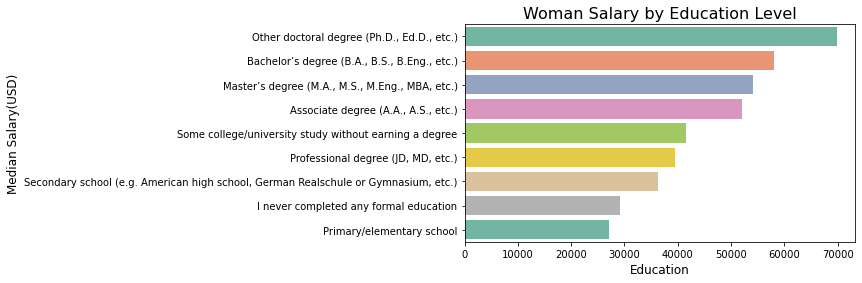

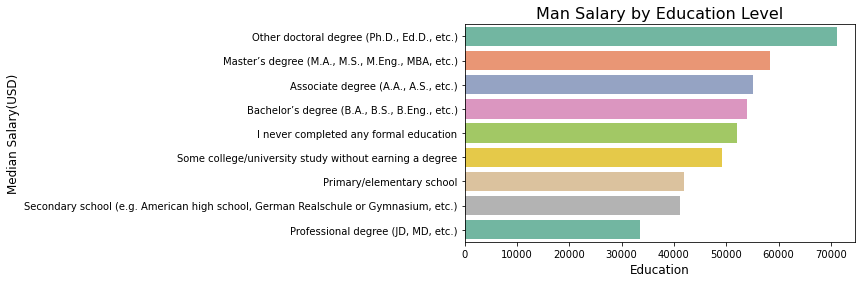

In [213]:
#plotting median salary per education level: man
from numpy import median
plt.figure(figsize=[7,4])
sns.barplot( y = 'EdLevel' , x = 'ConvertedComp', data = df_woman_ed_dev_sorted, estimator = median,palette = sns.color_palette("Set2"))
plt.title('Woman Salary by Education Level', fontsize = 16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Median Salary(USD)',  fontsize=12)

#plotting median salary per education level: woman
plt.figure(figsize=[7,4])
sns.barplot( y = 'EdLevel' , x = 'ConvertedComp', data = df_man_ed_dev_sorted, palette = sns.color_palette("Set2"),estimator = median)
plt.title('Man Salary by Education Level', fontsize = 16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Median Salary(USD)',  fontsize=12)

plt.show()

For both women and men, the higher the education (Doctoral degree), the higher the salary. Although for woman, bachelor degree earn more than master degree. T median is quite close between women who have Bachelor, Master or Associate degree. Women who never completed formal education earn way less than men with the same qualification.

#### d. YearsCodePro and Salary

In [189]:
df_gensal_yrs

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,11-15
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,1-5
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,1-5
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,6-10
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,16-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63402,64810,I am a developer by profession,Yes,32.0,12,Yearly,74500.0,74500.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Flask;jQuery;React.js;Vue.js,Angular;ASP.NET Core;Django;jQuery,Just as welcome now as I felt last year,35.0,19,6-10
63457,64872,I am a developer by profession,Yes,NaN,13,Monthly,2200000.0,7764.0,Colombia,Colombian peso,...,NaN,NaN,NaN,Web development or web design,Django;Express;Flask;React.js,jQuery,A lot more welcome now than last year,43.0,17,11-15
63517,64938,I am a developer by profession,No,33.0,13,Yearly,55000.0,59454.0,France,European Euro,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask;jQuery;Ruby on Rails,Just as welcome now as I felt last year,40.0,20,11-15
63955,65414,I am a developer by profession,Yes,22.0,17,Monthly,30000.0,9612.0,Mauritius,Mauritian rupee,...,Difficult,Too long,No,"Computer science, computer engineering, or sof...",Angular;Django,Gatsby;jQuery;Laravel;React.js,Just as welcome now as I felt last year,40.0,5,1-5


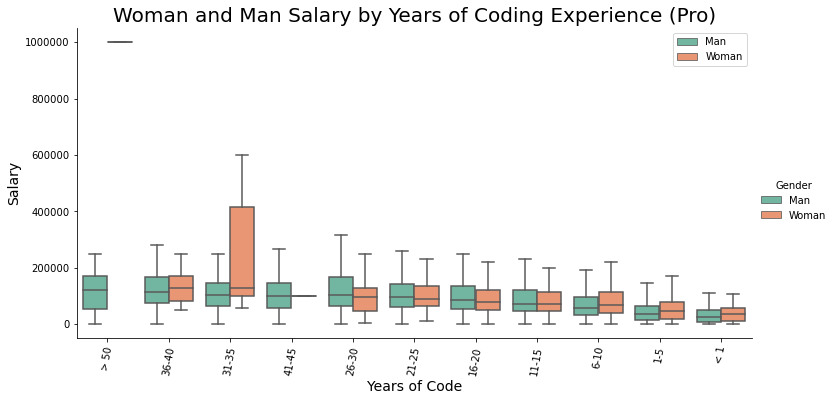

In [190]:
sns.catplot(x="YearsCodePro", y="ConvertedComp", hue="Gender", kind="box", estimator = median, data=df_gensal_yrs, aspect=12/6, showfliers = False, palette = sns.color_palette("Set2"), order=['> 50', '36-40','31-35','41-45','26-30','21-25','16-20','11-15','6-10','1-5','< 1'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Woman and Man Salary by Years of Coding Experience (Pro)', fontsize = 20)
plt.xlabel('Years of Code', fontsize=14)
plt.legend(title='', loc='upper right')
plt.xticks(rotation = 80)
#plt.ylim(,1500000)
plt.ylabel('Salary',  fontsize=14)
plt.show()

In [191]:
#group the data for coding experience and gender
df_gen_yrs_sal_woman_grouped = df_woman_yrs.groupby(["YearsCodePro", "Gender"]).median()
df_gen_yrs_sal_man_grouped = df_man_yrs.groupby(["YearsCodePro", "Gender"]).median()

In [192]:
#changing the index into columns so that it can be plotted
df_gen_yrs_sal_woman_grouped =  df_gen_yrs_sal_woman_grouped.reset_index(level=['YearsCodePro', 'Gender'])
#changing the index into columns so that it can be plotted
df_gen_yrs_sal_man_grouped =  df_gen_yrs_sal_man_grouped.reset_index(level=['YearsCodePro', 'Gender'])

In [193]:
df_woman_sal_yrs_sorted = df_gen_yrs_sal_woman_grouped.sort_values('ConvertedComp', ascending = False)
df_man_sal_yrs_sorted = df_gen_yrs_sal_man_grouped.sort_values('ConvertedComp', ascending = False)

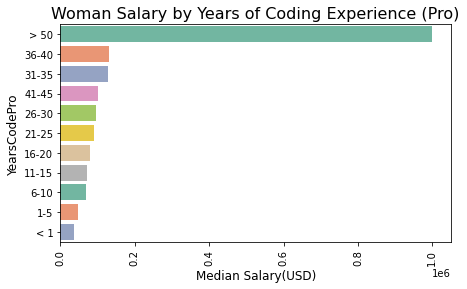

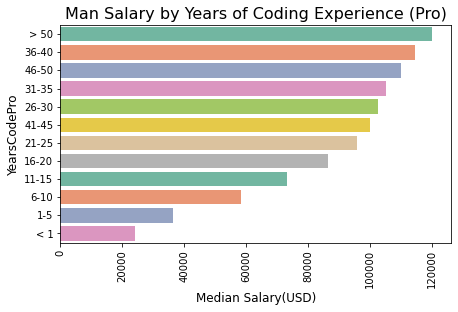

In [214]:
#plot median salary based on years of coding: man
from numpy import median

plt.figure(figsize=[7,4])
sns.barplot( y = 'YearsCodePro' , x = 'ConvertedComp', estimator = median,palette = sns.color_palette("Set2"), data = df_woman_sal_yrs_sorted)
plt.title('Woman Salary by Years of Coding Experience (Pro)', fontsize = 16)
plt.ylabel('YearsCodePro', fontsize=12)
plt.xticks(rotation = 90)
plt.xlabel("Median Salary(USD)", fontsize=12)


#plot median salary based on years of coding: woman
plt.figure(figsize=[7,4])
sns.barplot( y = 'YearsCodePro' , x = 'ConvertedComp', estimator = median, palette = sns.color_palette("Set2"), data = df_man_sal_yrs_sorted)
plt.title('Man Salary by Years of Coding Experience (Pro)', fontsize = 16)
plt.ylabel('YearsCodePro', fontsize=12)
plt.xticks(rotation = 90)
plt.xlabel("Median Salary(USD)", fontsize=12)

plt.show()


Both men and women who have more than 50 years of experience have the highest median salary, however there's only one observation for women. This might be an error or perhaps from more than 100 women respondents with the age > 50, there's not much who have experience > 50 years. Either way, it is something that we can look at further. Overall, develoeprs (women and men) who have > 30 yers of experience, considerabley earn more.

# Discussion

See for some discussion of the main finding on my [Medium](https://widyapuspitaloka.medium.com/women-in-tech-comparison-between-women-and-men-developers-f38d2d186640).